# Project: Analyzing a Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question">Relevant Questions</a></li>   
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<br> The following project will analyze the TMDb movie data. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. In particular, we will be interested in which genres are most popular from year to year, and what kinds of properties are associated with movies that have high revenues.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='question'></a>
## Relevant Questions

#### Univariate Analysis <br>
1. What is the distribution of Budget (in terms of 2010 dollars)?<br>
2. What is the distribution of Revenue (in terms of 2010 dollars)?<br>
3. What is the distribution of Popularity?<br>
4. What is the distribution of Vote Average?<br>
5. What is the distribution of Runtime?<br>
6. Has the amount of movies per year increased through the years?<br>
7. What are the highest-revenue movies among the whole dataset?<br>

#### Multi-variate Analysis<br>
1. Has the movies' annual revenue increased trough the years?
2. What properties are associated with movies that have higher revenues? <br>
2.1. Is budget associated with higher revenues? <br>
2.2. Is popularity associated with higher revenues? <br>
2.3. Is vote_average associated with higher revenues? <br>
2.4. Is runtime associated with higher revenues? <br>
3. How has the movies runtime changed through the years?
4. What properties are associated with popularity and vote average?<br>
4.1. Is popularity associated with vote_average?<br>
4.2. Is runtime associated with vote_average?<br>
4.3. Is release_year associated with vote_average?<br>
4.4. Is budget_adj associated with vote_average?<br>
4.5. Is runtime associated with popularity?<br>
4.6. Is release_year associated with popularity?<br>
4.7. Is budget_adj associated with popularity?<br>
5. Do movies from certain director have higher popularity, higher vote_average or higher revenues?
6. What's the distribution of amount of movies by genre?
7. Is certain genre associated with higher popularity, higher vote_average or higher revenues?
8. Which genres are the most predominant from year to year?
9. Which genres are most popular from year to year?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Reading data
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Reading the first 2 columns of data
df.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.   

       ...                                                overview runtime  \
0      ...       Twenty-two years after the events of Jurassic ...     124   
1      ...       An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  

[2 rows x 21 columns]

In [4]:
# Let's check the size of this dataset
df.shape

(10866, 21)

In [5]:
# Since not all columns are shown in the Notebook, let's check all the columns' names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

This dataset contains 21 columns, with the following detail:
- id: Unique identifier of each movie. (Data type required: string)
- imdb_id: Unique identifier of each movie for the Database. (Data type required: string)
- popularity: Value that represents the IMDb popularity score of a movie. (Data type required: float)
- budget: Budget of movie, in terms of dollars. (Data type required: int)*
- revenue: Revenue of movie, in terms of dollars. (Data type required: int)*
- original_title: Original title of movie. (Data type required: string)
- cast: Actors and actresses that participated in the movie. (Data type required: string)
- homepage: Website of movie. (Data type required: string)*
- director: Director or list of directors of the movie. (Data type required: string)
- tagline: Catchy short phrase used to advertise and sell the movie. (Data type required: string)*
- keywords: Keywords used to represent the movie inside the Database. (Data type required: string)*
- overview: Brief description of the movie plot. (Data type required: string)*
- runtime: Length of a movie in minutes. (Data type required: int)
- genres: Genre or list of genres of a movie. (Data type required: string)
- production_companies: Company or list of companies that produced the movie. (Data type required: string)
- release_date: Date of release of a movie. (Data type required: time)*
- vote_count: The amount of votes the movie received by users. (Data type required: int)*
- vote_average: The average of vote punctuation a movie received by users. (Data type required: float)
- release_year: Year of release of a movie. (Data type required: int)
- budget_adj: Budget of the movie in terms of 2010 dollars, accounting for inflation over time. (Data type required: float)
- revenue_adj: Revenue of the movie in terms of 2010 dollars, accounting for inflation over time. (Data type required: float)

It's worth noting that the popularity column, according to <a href="https://developers.themoviedb.org/3/getting-started/popularity">IMDB website</a>, takes into account the following factors for movies:
- Number of votes for the day
- Number of views for the day
- Number of users who marked it as a "favourite" for the day
- Number of users who added it to their "watchlist" for the day
- Release date
- Number of total votes
- Previous days score

In [6]:
# Let's print a summary of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We see that there are missing values in the following columns:
- imdb_id
- cast
- homepage
- director
- tagline
- keywords
- overview
- genres
- production_companies

We also see that there are columns with incorrect data types, or with a data type different than what we require:
- id
- release_date

In [7]:
# Let's look at the unique values of each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
# Let's see how many duplicated rows (only rows with identical values in every column) are in our dataset
df.duplicated().sum()

1

This info provides some light in possible duplicated values when there should not be:
- Seems both id and imdb_id have duplicated or missing values as they should have 10866 unique values.
- It also seems original_title have duplicated values, more analysis should be made as there are movie titles with the same name in real life.

In [9]:
# Let's see the first 2 rows of "keywords" column
df.keywords.head(2)

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
Name: keywords, dtype: object

Also, it's worth noting that certain columns ("cast", "genres", "keywords", "director" and "production_companies") contain multiple values separated by pipe (|) character, that we would need to preprocess before doing our analysis.

### Data Cleaning

#### 1. Dropping Columns and Duplicated Rows
The first step in our cleaning process is to remove columns that will not be used in the analysis. This will allow our scripts to be more efficient and will give us a more clean table to analyze. The reasoning for each drop is as follows:
<br>
- We decided to drop the columns "budget" and "revenue" as the "budget_adj" and "revenue_adj" have the same information but in terms of 2010 dollars that make the comparison possible.
- We decided to drop the column "cast" as there is no information about which actor/actress is the lead or support one.
- We also decided to drop the column "homepage" as this information will not be analyzed.
- The columns "tagline", "keywords" and "overview" will be removed because sentiment analysis is not in the scope of this project.
- The column "production_companies" will also be dropped as there is no information about the role of each production company in the making of the film (for example: production, distribution, shares, etc) to compliment the analysis.
- The column "release_date" will be removed as we will only use the "release_year" column for the analysis.
- The column "vote_count" will be also removed because there is already the "vote_average" column that we will use.


In [10]:
# Dropping columns
df.drop(['budget', 'revenue', 'homepage', 'cast','tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count'], axis=1, inplace=True)

In [11]:
# Let's check the first row of our updated table
df.head(1)

id    imdb_id  popularity  original_title         director  runtime  \
0  135397  tt0369610   32.985763  Jurassic World  Colin Trevorrow      124   

                                      genres  vote_average  release_year  \
0  Action|Adventure|Science Fiction|Thriller           6.5          2015   

     budget_adj   revenue_adj  
0  1.379999e+08  1.392446e+09

Coming up, we will analyze duplicated rows.

In [12]:
# Let's see the only duplicated value from this dataset
df[df.duplicated(keep=False)]

id    imdb_id  popularity original_title          director  runtime  \
2089  42194  tt0411951     0.59643         TEKKEN  Dwight H. Little       92   
2090  42194  tt0411951     0.59643         TEKKEN  Dwight H. Little       92   

                                           genres  vote_average  release_year  \
2089  Crime|Drama|Action|Thriller|Science Fiction           5.0          2010   
2090  Crime|Drama|Action|Thriller|Science Fiction           5.0          2010   

      budget_adj  revenue_adj  
2089  30000000.0     967000.0  
2090  30000000.0     967000.0

Since this seems like a repetitive data and it's only one, we will drop the last one.

In [13]:
# Dropping duplicated row
df.drop_duplicates(inplace=True)

In [14]:
# Checking the duplicated row is gone
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [id, imdb_id, popularity, original_title, director, runtime, genres, vote_average, release_year, budget_adj, revenue_adj]
Index: []

In [15]:
# Let's see the summary of the updated table
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
id                10865 non-null int64
imdb_id           10855 non-null object
popularity        10865 non-null float64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1018.6+ KB


In [16]:
# Let's check the unique values of the updated table
df.nunique()

id                10865
imdb_id           10855
popularity        10814
original_title    10571
director           5067
runtime             247
genres             2039
vote_average         72
release_year         56
budget_adj         2614
revenue_adj        4840
dtype: int64

Since the "id" column now have the exact amount of unique rows as amount of rows in the dataset, we no longer need the "imdb_id" column. So we will drop it too.

In [17]:
# Dropping the "imdb_id" column
df.drop(['imdb_id'], axis=1, inplace=True)

In [18]:
# Let's see how our columns look
df.head(2)

id  popularity      original_title         director  runtime  \
0  135397   32.985763      Jurassic World  Colin Trevorrow      124   
1   76341   28.419936  Mad Max: Fury Road    George Miller      120   

                                      genres  vote_average  release_year  \
0  Action|Adventure|Science Fiction|Thriller           6.5          2015   
1  Action|Adventure|Science Fiction|Thriller           7.1          2015   

     budget_adj   revenue_adj  
0  1.379999e+08  1.392446e+09  
1  1.379999e+08  3.481613e+08

#### 2. Analyzing missing values

In [19]:
# Let's count the missing values in each column
df.isnull().sum()

id                 0
popularity         0
original_title     0
director          44
runtime            0
genres            23
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [20]:
# Let's look at the proportions of the missing values in each column
(df.isnull().sum() / df.shape[0]) * 100

id                0.000000
popularity        0.000000
original_title    0.000000
director          0.404970
runtime           0.000000
genres            0.211689
vote_average      0.000000
release_year      0.000000
budget_adj        0.000000
revenue_adj       0.000000
dtype: float64

It looks like we have:
- 0.40% of "director" data as missing values
- 0.21% of "genre" data as missing values

All of these are categorical variables, so we cannot impute them as easily as with the numerical variables (with mean or median).<br>
Since we are going to use the "genres" column for our analysis, let's first look deeper to those missing values in that column:

In [21]:
# Let's look at the row values where "genres" column is null
df[df.genres.isnull()].head(10)

id  popularity                                     original_title  \
424   363869    0.244648                                     Belli di papÃ    
620   361043    0.129696                                 All Hallows' Eve 2   
997   287663    0.330431               Star Wars Rebels: Spark of Rebellion   
1712   21634    0.302095                                  Prayers for Bobby   
1897   40534    0.020701             Jonas Brothers: The Concert Experience   
2370  127717    0.081892                                    Freshman Father   
2376  315620    0.068411                      Doctor Who: A Christmas Carol   
2853   57892    0.130018                                          Vizontele   
3279   54330    0.145331                                      ì•„ê¸°ì™€ ë‚˜   
4547  123024    0.520520  London 2012 Olympic Opening Ceremony: Isles of...   

                                               director  runtime genres  \
424                                        Guido Chiesa      100    NaN   
620   Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...       90    NaN   
997                           Steward Lee|Steven G. Lee       44    NaN   
1712                                    Russell Mulcahy       88    NaN   
1897                                    Bruce Hendricks       76    NaN   
2370                                      Michael Scott        0    NaN   
2376                                                NaN       62    NaN   
2853                                   YÄ±lmaz ErdoÄŸan      110    NaN   
3279                                      Kim Jin-Yeong       96    NaN   
4547                                        Danny Boyle      220    NaN   

      vote_average  release_year  budget_adj  revenue_adj  
424            6.1          2015         0.0          0.0  
620            5.0          2015         0.0          0.0  
997            6.8          2014         0.0          0.0  
1712           7.4          2009         0.0          0.0  
1897           7.0          2009         0.0          0.0  
2370           5.8          2010         0.0          0.0  
2376           7.7          2010         0.0          0.0  
2853           7.2          2001         0.0          0.0  
3279           6.1          2008         0.0          0.0  
4547           8.3          2012         0.0          0.0

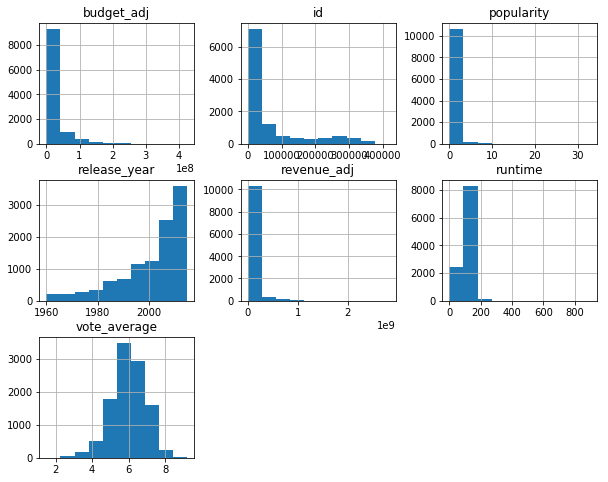

In [22]:
# Let's look at the histogram of the whole dataframe
df.hist(figsize=(10,8));

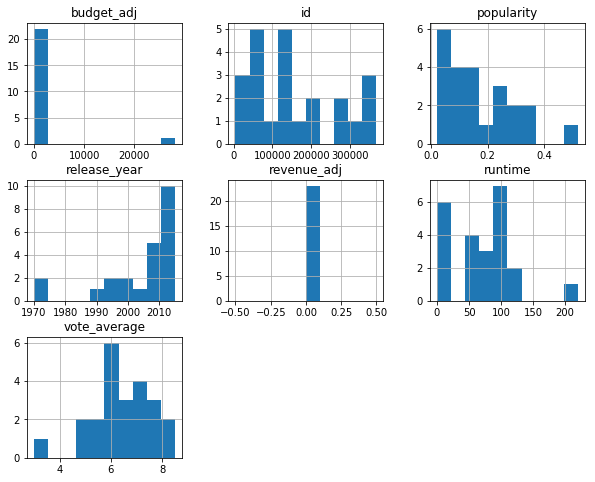

In [23]:
# Let's also look at the histograms of the data where the "genres" column is null
df[df.genres.isnull()].hist(figsize=(10,8));

It looks like where the "genres" column has NULL values, it also has zero value in "budget_adj" and "revenue_adj" (in most cases), when there should be some minimum number at least. <br>
Also, where the "genres" column is empty, other column like "director" is also empty.<br>
So, considering that and the fact that rows with missing values in "genres" column are only 0.21% of the whole dataset, we will remove those rows.

In [24]:
# Removing rows where "genres" is null
df = df[df['genres'].notna()]

In [25]:
# Let's check that rows where "genres" column is null are gone
df[df.genres.isnull()]

Empty DataFrame
Columns: [id, popularity, original_title, director, runtime, genres, vote_average, release_year, budget_adj, revenue_adj]
Index: []

In [26]:
# Let's count once again the missing values in each column
df.isnull().sum()

id                 0
popularity         0
original_title     0
director          42
runtime            0
genres             0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [27]:
# Let's also look at the proportions of the missing values in each column
(df.isnull().sum() / df.shape[0]) * 100

id                0.000000
popularity        0.000000
original_title    0.000000
director          0.387382
runtime           0.000000
genres            0.000000
vote_average      0.000000
release_year      0.000000
budget_adj        0.000000
revenue_adj       0.000000
dtype: float64

It looks like we still have:
- 0.39% of "director" data as missing values

Since we are going to use the "director" column for our analysis, let's look deeper to the missing values in that column:

In [28]:
# Let's look at the row values where "director" column is null
df[df.director.isnull()].head(10)

id  popularity                         original_title director  \
532   320996    0.126594         Iliza Shlesinger: Freezing Hot      NaN   
548   355131    0.108072             Sense8: Creating the World      NaN   
556   321160    0.100910                         With This Ring      NaN   
1032  259910    0.291253  Marvel Studios: Assembling a Universe      NaN   
1054  253675    0.269468                     Unlocking Sherlock      NaN   
1203  256561    0.119891                           Free to Play      NaN   
1241  296370    0.135376                              Dance-Off      NaN   
1288  301235    0.038364      Top Gear: The Perfect Road Trip 2      NaN   
1852  133365    0.256703                The Diary of Anne Frank      NaN   
1872   26379    0.091395                                    Paa      NaN   

      runtime                       genres  vote_average  release_year  \
532        71                       Comedy           6.6          2015   
548        25  Documentary|Science Fiction           7.5          2015   
556       105               Comedy|Romance           6.5          2015   
1032       43         TV Movie|Documentary           6.3          2014   
1054       60         TV Movie|Documentary           7.2          2014   
1203       75                  Documentary           7.0          2014   
1241        0         Romance|Music|Comedy           5.7          2014   
1288       94                  Documentary           6.8          2014   
1852      100                        Drama           7.5          2009   
1872      133         Drama|Family|Foreign           6.1          2009   

        budget_adj  revenue_adj  
532   0.000000e+00          0.0  
548   0.000000e+00          0.0  
556   0.000000e+00          0.0  
1032  0.000000e+00          0.0  
1054  0.000000e+00          0.0  
1203  1.381637e+05          0.0  
1241  0.000000e+00          0.0  
1288  0.000000e+00          0.0  
1852  0.000000e+00          0.0  
1872  3.303301e+06          0.0

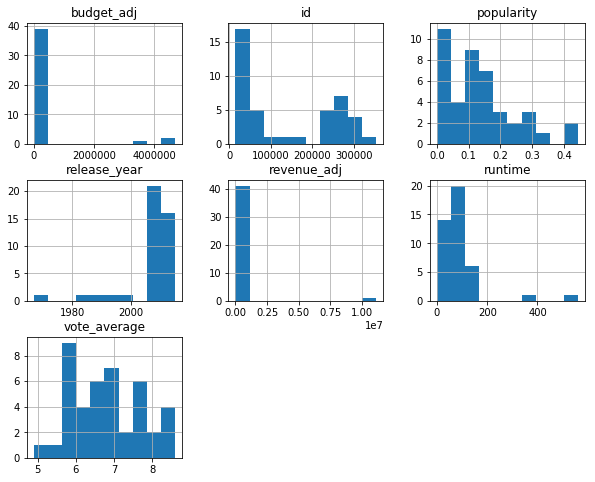

In [29]:
# Let's look at the histograms of the data where the "director" column is null
df[df.director.isnull()].hist(figsize=(10,8));

It looks like where the "director" column has NULL values, it also has zero in "budget_adj" and "revenue_adj" (in most cases), when there should be some minimum number at least. <br>
So, considering that and the fact that rows with missing values in "director" column are only 0.39% of the whole dataset, we will remove those rows.

In [30]:
# Removing rows where "director" is null
df = df[df['director'].notna()]

In [31]:
# Let's check that rows where "director" column is null are gone
df[df.director.isnull()]

Empty DataFrame
Columns: [id, popularity, original_title, director, runtime, genres, vote_average, release_year, budget_adj, revenue_adj]
Index: []

In [32]:
# Let's double check there is no missing data left
df.isnull().sum()

id                0
popularity        0
original_title    0
director          0
runtime           0
genres            0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

We now have our dataset without missing values. But in the process, we have realized that there were movies with "budget_adj" and "revenue_adj" with zero value, where there should be at least a minimum value. So let's see if there are still movies left with that pattern.

In [33]:
# Finding rows with zero budget or zero revenue
missing_budget_revenue = df[(df['budget_adj']==float(0)) | (df['revenue_adj']==float(0))]

# Let's see the shape of this "missing_budget_revenue" table
missing_budget_revenue.shape

(6947, 10)

In [34]:
# Let's see the top 5 rows with zero budget or zero revenue
missing_budget_revenue.head(5)

id  popularity    original_title                 director  runtime  \
30  280996    3.927333        Mr. Holmes              Bill Condon      103   
36  339527    3.358321            Solace            Afonso Poyart      101   
48  265208    2.932340         Wild Card               Simon West       92   
67  334074    2.331636          Survivor           James McTeigue       96   
72  284289    2.272044  Beyond the Reach  Jean-Baptiste LÃ©onetti       95   

                   genres  vote_average  release_year    budget_adj  \
30          Mystery|Drama           6.4          2015  0.000000e+00   
36    Crime|Drama|Mystery           6.2          2015  0.000000e+00   
48   Thriller|Crime|Drama           5.3          2015  2.759999e+07   
67  Crime|Thriller|Action           5.4          2015  1.839999e+07   
72               Thriller           5.5          2015  0.000000e+00   

     revenue_adj  
30  2.700677e+07  
36  2.056620e+07  
48  0.000000e+00  
67  0.000000e+00  
72  4.222338e+04

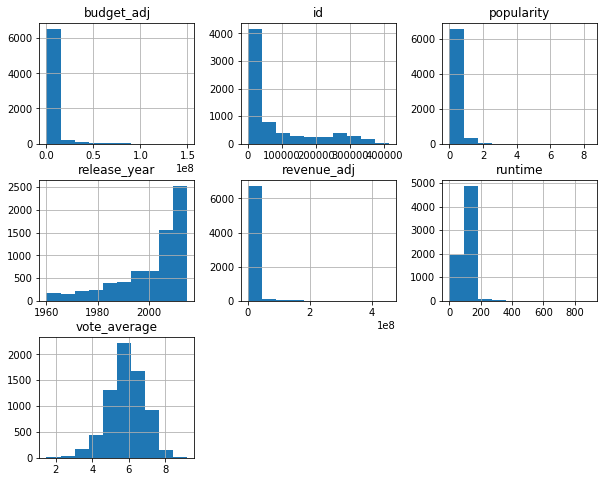

In [35]:
# Let's look at the histogram of rows with zero budget or zero revenue
missing_budget_revenue.hist(figsize=(10,8));

In [36]:
# Let's calculate the proportion of rows with zero budget or zero revenue
(missing_budget_revenue.shape[0]) / (df.shape[0]) * 100

64.32407407407408

In [37]:
# Finding rows without zero budget nor zero revenue
no_missing_budget_revenue = df[(df['budget_adj']!=float(0)) & (df['revenue_adj']!=float(0))]

# Let's see the shape of this "no_missing_budget_revenue" table
no_missing_budget_revenue.shape

(3853, 10)

In [38]:
# Let's see the top 5 rows without zero budget nor zero revenue
no_missing_budget_revenue.head(5)

id  popularity                original_title          director  \
0  135397   32.985763                Jurassic World   Colin Trevorrow   
1   76341   28.419936            Mad Max: Fury Road     George Miller   
2  262500   13.112507                     Insurgent  Robert Schwentke   
3  140607   11.173104  Star Wars: The Force Awakens       J.J. Abrams   
4  168259    9.335014                     Furious 7         James Wan   

   runtime                                     genres  vote_average  \
0      124  Action|Adventure|Science Fiction|Thriller           6.5   
1      120  Action|Adventure|Science Fiction|Thriller           7.1   
2      119         Adventure|Science Fiction|Thriller           6.3   
3      136   Action|Adventure|Science Fiction|Fantasy           7.5   
4      137                      Action|Crime|Thriller           7.3   

   release_year    budget_adj   revenue_adj  
0          2015  1.379999e+08  1.392446e+09  
1          2015  1.379999e+08  3.481613e+08  
2          2015  1.012000e+08  2.716190e+08  
3          2015  1.839999e+08  1.902723e+09  
4          2015  1.747999e+08  1.385749e+09

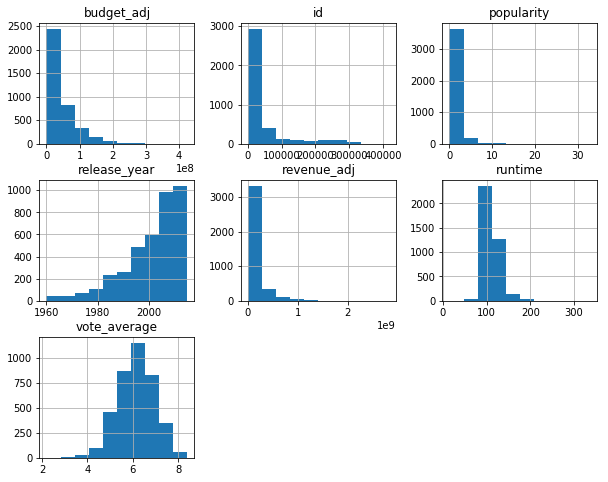

In [39]:
# Let's look at the histogram of rows without zero budget nor zero revenue
no_missing_budget_revenue.hist(figsize=(10,8));

Seems like the data that have either zero budget or zero revenue have similar behavior than the rest of the data. Also, this data with either zero budget or zero revenue represents a 64% of the dataset (after cleaning some missing and duplicated values).<br>

However, since our analysis goes around the movies with higest revenues, it is important to analyze ONLY the data that has revenues different than zero. Also, we need movies that have budget different than zero, because it is only coherent for it have at least some amount of budget for the production, cast, marketing, etc. <br>
Therefore we will use the "no_missing_budget_revenue" table for our analysis.<br>

In [40]:
# Assigning the "no_missing_budget_revenue" data to our dataset
df = no_missing_budget_revenue

In [41]:
# Let's check top5 rows of our new dataset
df.head(5)

id  popularity                original_title          director  \
0  135397   32.985763                Jurassic World   Colin Trevorrow   
1   76341   28.419936            Mad Max: Fury Road     George Miller   
2  262500   13.112507                     Insurgent  Robert Schwentke   
3  140607   11.173104  Star Wars: The Force Awakens       J.J. Abrams   
4  168259    9.335014                     Furious 7         James Wan   

   runtime                                     genres  vote_average  \
0      124  Action|Adventure|Science Fiction|Thriller           6.5   
1      120  Action|Adventure|Science Fiction|Thriller           7.1   
2      119         Adventure|Science Fiction|Thriller           6.3   
3      136   Action|Adventure|Science Fiction|Fantasy           7.5   
4      137                      Action|Crime|Thriller           7.3   

   release_year    budget_adj   revenue_adj  
0          2015  1.379999e+08  1.392446e+09  
1          2015  1.379999e+08  3.481613e+08  
2          2015  1.012000e+08  2.716190e+08  
3          2015  1.839999e+08  1.902723e+09  
4          2015  1.747999e+08  1.385749e+09

In [42]:
# Let's check the shape of this new dataset
df.shape

(3853, 10)

### 3. Fixing Data Types
Before moving forward let's fix the datatypes from the remaining variables

In [43]:
# Let's check the summary of our updated table
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 10 columns):
id                3853 non-null int64
popularity        3853 non-null float64
original_title    3853 non-null object
director          3853 non-null object
runtime           3853 non-null int64
genres            3853 non-null object
vote_average      3853 non-null float64
release_year      3853 non-null int64
budget_adj        3853 non-null float64
revenue_adj       3853 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 331.1+ KB


We are going to convert "id" column to a string type as we will not perform numeric calculations with it.<br>

In [44]:
# Fixing datatypes
df = df.astype({'id':'str'})
df.dtypes

id                 object
popularity        float64
original_title     object
director           object
runtime             int64
genres             object
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

We now have our dataset completely clean and ready for analysis.

<a id='eda'></a>
## Exploratory Data Analysis

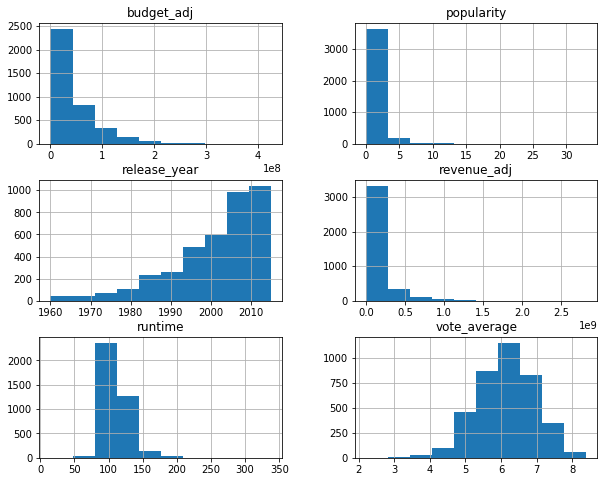

In [45]:
# Let's first quickly review the histogram of all the numerical variables in the dataset
df.hist(figsize=(10,8));

### UNIVARIATE ANALYSIS
### 1. What is the distribution of Budget (in terms of 2010 dollars)?

In [46]:
# Let's define the function for Histograms of Numerical Continuous Values

def func_hist(x,var_name, xlabel,ylabel):
    fig,ax = plt.subplots(figsize=(15,8))
    plt.hist(x, bins='auto')
    plt.title('Histogram of {}'.format(var_name))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.set_xlim(0,)
    ax.set_ylim(0,)
    return plt.show();

It's importat to notice that we chose the "auto" method to select the number of bins of histograms. These auto method chooses the maximum number of bins between the "Sturges" and "Freedman Diaconis" estimators.

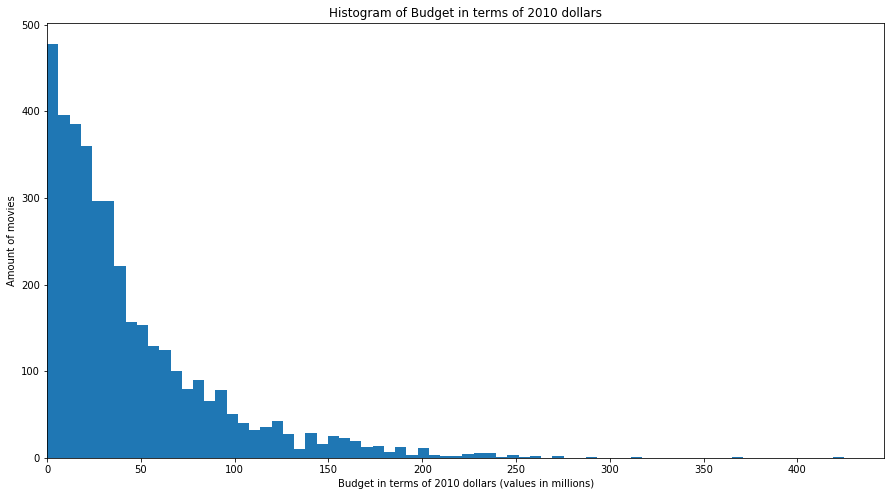

In [47]:
# Let's see the histogram in detail for budget_adj
func_hist(df['budget_adj']/1e6,'Budget in terms of 2010 dollars', 'Budget in terms of 2010 dollars (values in millions)', 'Amount of movies')

We can see that the distribution of Budget in terms of 2010 dollars is skewed to the right. This shows that most of the movies in our clean dataset have a lower budget (less than 100 millions) compared to the minimum amount of movies who have a budget over 100 millions. This high-budget movies can even have a budget over 400 millions.

In [48]:
# Let's define the function for Boxplot of Numerical Continuous Values

def func_box(X, var_name, xlabel):
    fig, ax = plt.subplots(figsize=(16,6))
    bp = plt.boxplot(X, vert=False, showmeans=True)
    plt.title('Boxplot of {}'.format(var_name))
    plt.xlabel(xlabel)
    plt.yticks([1],["Boxplot"], rotation=90, verticalalignment="center")
    ax.grid(b=True, axis='x')
    
    # Adding mean label
    if abs(X.mean() - X.median()) < 0.1:
        ax.text(X.mean(), 1.02, '%.2f' %(X.mean()),color='green')
    else:
        ax.text(X.mean(), 1.02, '%.1f' %(X.mean()),color='green')
    
    # Adding median label
    x, y = bp['medians'][0].get_xydata()[1] 
    if abs(X.mean() - X.median()) < 0.1:
        ax.text(x, y+0.01, '%.2f' % x, horizontalalignment='center')
    else:
        ax.text(x, y+0.01, '%.1f' % x, horizontalalignment='center')
    
    # Adding quantiles labels
    x, y = bp['boxes'][0].get_xydata()[0]
    ax.text(x,y-0.01, '%.1f' % x, horizontalalignment='center', verticalalignment='top')
    x, y = bp['boxes'][0].get_xydata()[3] 
    ax.text(x,y-0.01, '%.1f' % x, horizontalalignment='center', verticalalignment='top')
    
    # Adding whiskers labels
    x, y = bp['caps'][0].get_xydata()[0]
    ax.text(x,y-0.01, '%.1f' % x, horizontalalignment='center', verticalalignment='top')
    x, y = bp['whiskers'][1].get_xydata()[1] 
    ax.text(x,y-0.05, '%.1f' % x, horizontalalignment='center', verticalalignment='top')  
    
    # Setting xlim
    if X.min() > 0.01:
        ax.set_xlim(0,)
    return plt.show();

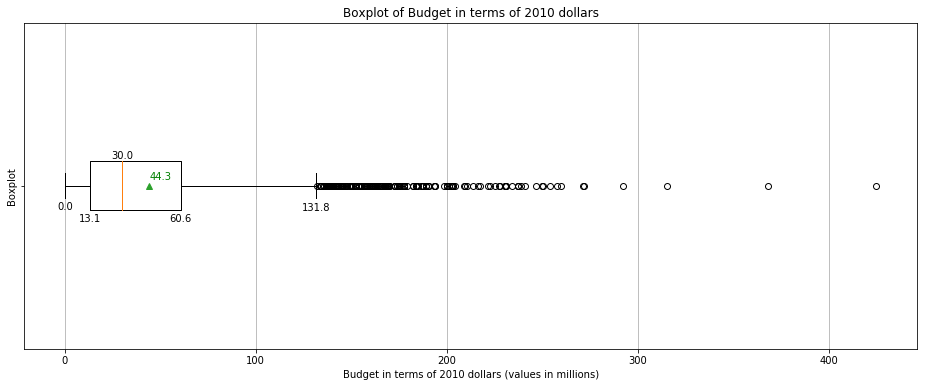

In [49]:
# Let's see the boxplot of budjet_adj
func_box(df['budget_adj']/1e6, 'Budget in terms of 2010 dollars', 'Budget in terms of 2010 dollars (values in millions)')

If we look at the boxplot of Budget in terms of 2010 dollars, we can see that the mayority of movies in our clean dataset (between 25% and 75% percentile) had a budget between 13.1 and 60.6 millions of dollars.<br>
Also, its worth noticing that since we have a great amount of outliers with high values, the mean is much greater than the median. We should take this into consideration when deciding to use median or mean for our analysis.

### 2. What is the distribution of Revenue (in terms of 2010 dollars)?

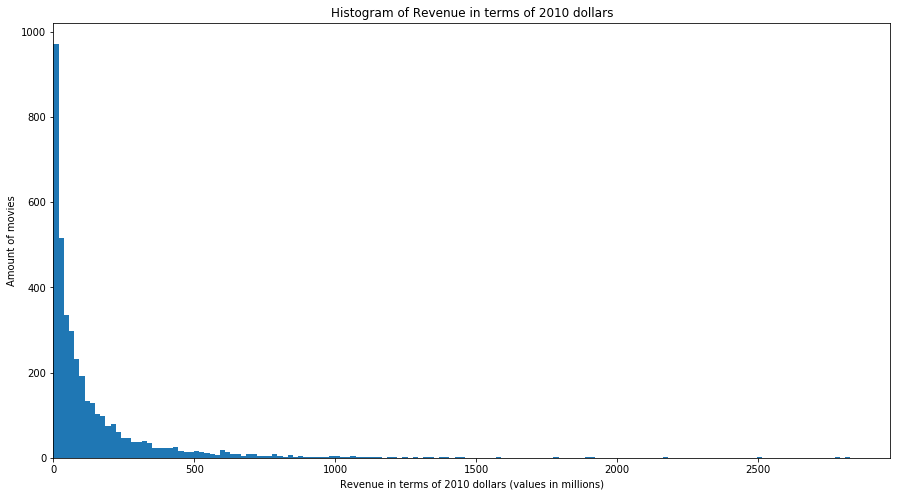

In [50]:
# Let's see the histogram in detail for revenue_adj
func_hist(df['revenue_adj']/1e6,'Revenue in terms of 2010 dollars', 'Revenue in terms of 2010 dollars (values in millions)', 'Amount of movies')

We can see that the distribution of Revenue in terms of 2010 dollars is also skewed to the right. This shows that most of the movies in our clean dataset have a lower revenue (less than 500 millions) compared to the minimum amount of movies who have a revenue over 500 millions. This high-revenue movies can even have a revenue over 2,500 millions.

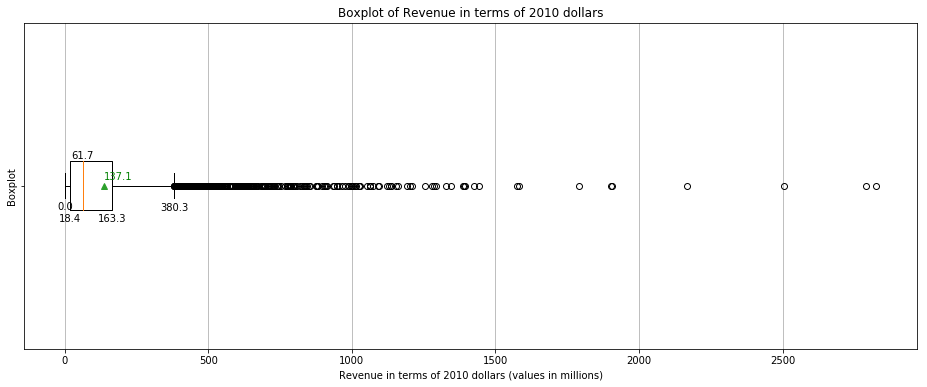

In [51]:
# Let's see the boxplot of revenue_adj
func_box(df['revenue_adj']/1e6, 'Revenue in terms of 2010 dollars', 'Revenue in terms of 2010 dollars (values in millions)')

If we look at the boxplot of Revenue in terms of 2010 dollar, we can see that the mayority of movies in our clean dataset (between 25% and 75% percentile) had a revenue between 18.4 and 163.3 millions of dollars.<br> 
Also, its worth noticing that since we have a great amount of outliers with high values, the mean is much greater than the median. We should take this into consideration when deciding to use median or mean for our analysis.

### 3. What is the distribution of Popularity? 


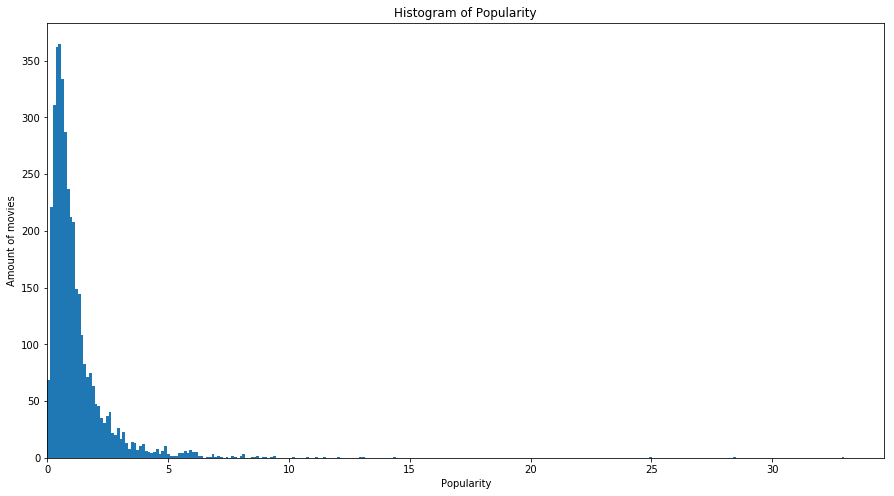

In [52]:
# Let's see the histogram in detail for popularity
func_hist(df['popularity'],'Popularity', 'Popularity', 'Amount of movies')

We can see that the distribution of Popularity is also skewed to the right. This shows that most of the movies in our clean dataset have a low popularity (less than 5) compared to the minimum amount of movies with popularity over 5. This high-popularity movies can even have a popularity score above 30.

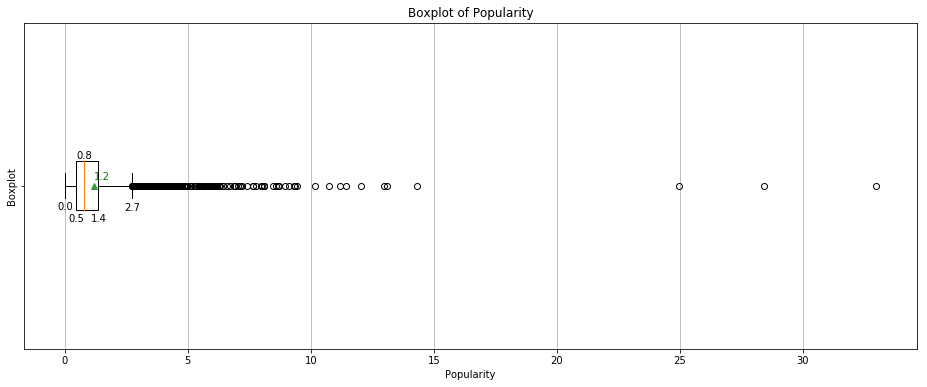

In [53]:
# Let's see the boxplot of popularity
func_box(df['popularity'], 'Popularity', 'Popularity')

If we look at the boxplot of Popularity, we can see that the mayority of movies in our clean dataset (between 25% and 75% percentile) had a popularity between 0.5 and 1.4.<br> 
Also, it's worth noticing that since we have a great amount of outliers with high values, the mean is greater than the median. We should take this into consideration when deciding to use median or mean for our analysis.

### 4. What is the distribution of Vote Average?


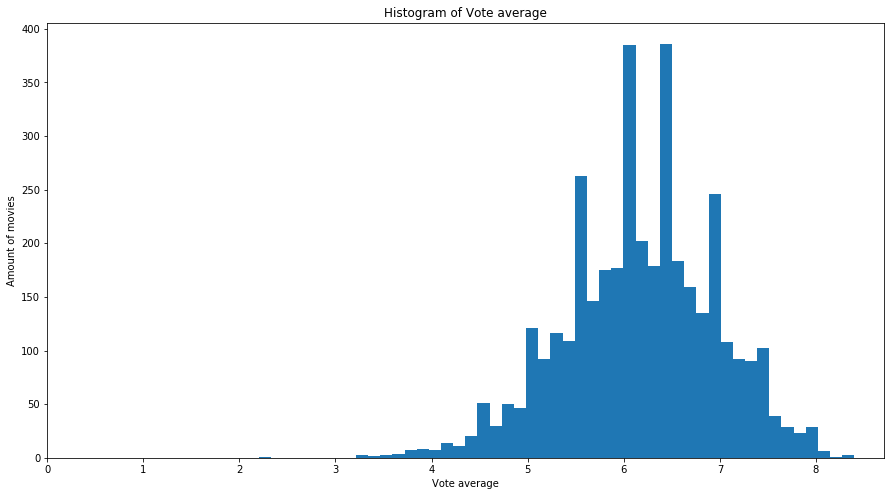

In [54]:
# Let's see the histogram in detail for Vote Average
func_hist(df['vote_average'],'Vote average', 'Vote average', 'Amount of movies')

Since our histogram looks similar to a normal distribution, we will use a density plot to analyze it.

In [55]:
# Let's define the density function for numerical continuous variables
def func_density(x, var_name, xlabel):
    fig, ax = plt.subplots(figsize=(16,6))
    sns.kdeplot(x, shade=True)
    plt.title('Density Plot of {}'.format(var_name))
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    ax.set_xlim(0,)
    ax.set_ylim(0,)
    return plt.show();

It's worth noticing that we kept the default values for kernell (gaussian method) and binwidth (scott method) for the density plot.

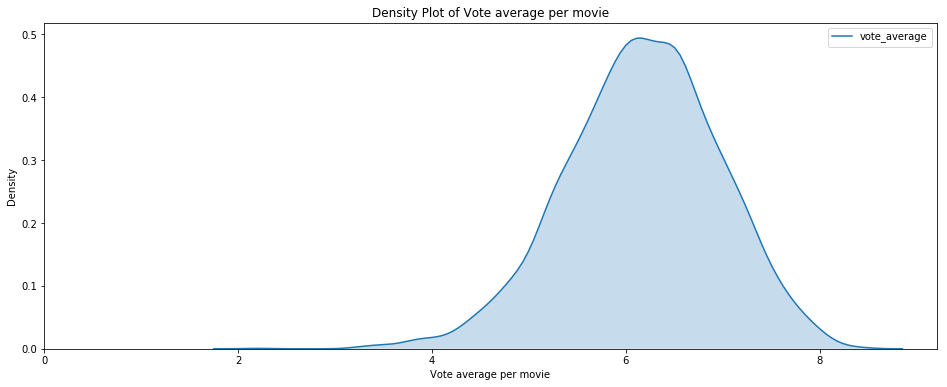

In [56]:
# Let's plot the density function for vote_average
func_density(df['vote_average'],'Vote average per movie', 'Vote average per movie')

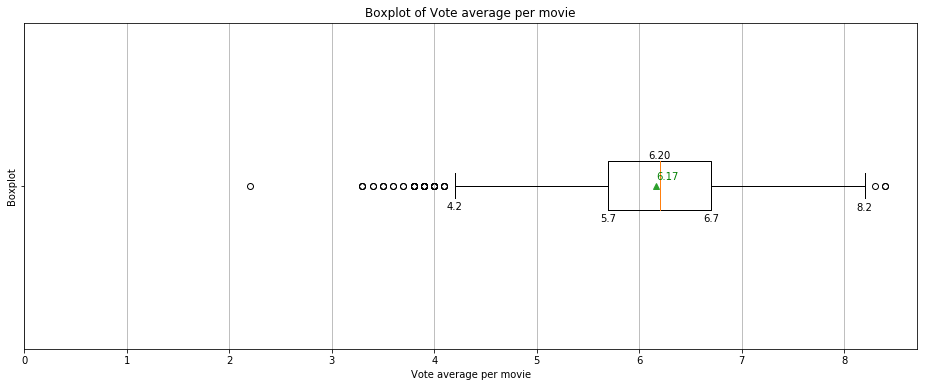

In [57]:
# Let's see the boxplot of vote_average
func_box(df['vote_average'], 'Vote average per movie', 'Vote average per movie')

From the density plot and boxplot, we can see that the distribution of Vote Average per movie looks similar to a normal distribution, with a similar mean and median. The mean is just 0.03 lower than the median due to the outliers on the left (movies with low vote average).<br>
The boxplot also shows that the mayority of movies (between 25% and 75% percentile), from our clean dataset, have a vote average between 5.7 and 6.7 points.

### 5. What is the distribution of Runtime?

In [58]:
# Let's check the unique values of "runtime" column
df['runtime'].nunique()

139

Since runtime has 139 unique values, even though it's a discrete variable, it would be best to use a histogram rather than a bar chart to analyze its distribution.

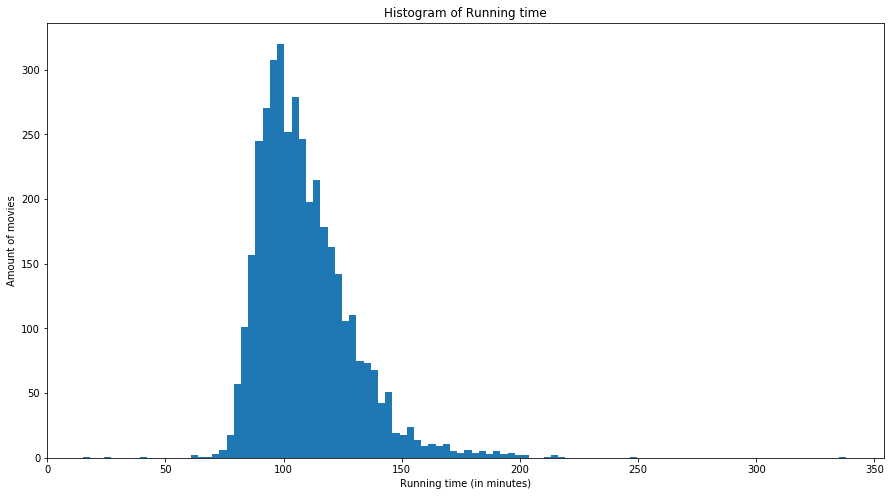

In [59]:
# Let's see the histogram in detail for Runtime
func_hist(df['runtime'],'Running time', 'Running time (in minutes)', 'Amount of movies')

We can see that the distribution of Running Time is also skewed to the right.

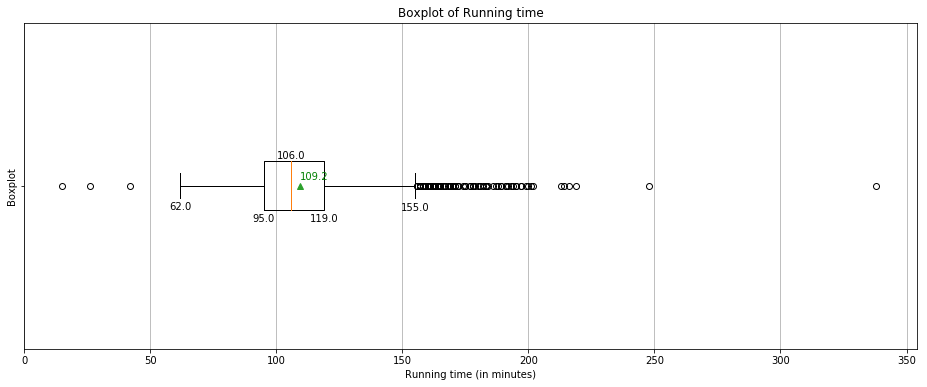

In [60]:
# Let's see the boxplot of runtime
func_box(df['runtime'], 'Running time', 'Running time (in minutes)')

If we look at the boxplot of Runtime, we can see that the mayority of movies in our clean dataset (between 25% and 75% percentile) had a running time between 95 and 119 minutes.<br> 
Also, its worth noticing that since we have a greater amount of outliers to the right, the mean is greater than the median. We should take this into consideration when deciding to use median or mean for our analysis.

### 6. Has the amount of movies per year increased through the years?

In [61]:
# Let's check the amount of years analyzed
df.release_year.nunique()

56

In [62]:
# Let's define the function for bar chart
def func_bar(X,title,xlabel,ylabel):
    fig, ax = plt.subplots(figsize=(16,6))
    X.plot.bar(color='lightblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.set_xlabel(xlabel, labelpad=15)
    ax.set_ylabel(ylabel, labelpad=15)
    return plt.show();    

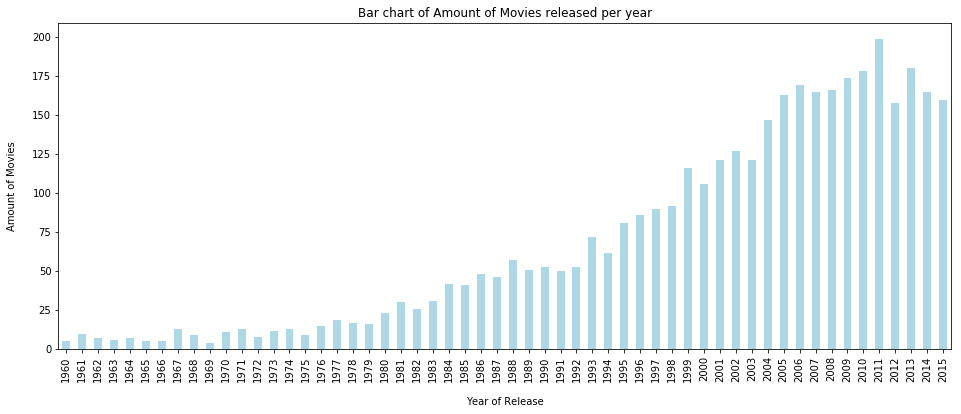

In [63]:
# Let's plot the bar chart
ej1 = df.groupby('release_year').size()
func_bar(ej1, 'Bar chart of Amount of Movies released per year', 'Year of Release', 'Amount of Movies')

In [64]:
# Let's see how many more movies were released in 2015 compared to 1960
diff = (ej1[2015] - ej1[1960]) / ej1[1960]
diff

31.0

From the bar chart above we can see that, in our clean dataset, the amount of movies released per year has increased through the years. For example, the amount of movies released in 2015 is 31 times higher than the amount released in 1960.

### 7. What are the highest-revenue movies among the whole dataset?

In [65]:
# Sorting the values by highest revenues first
df.sort_values(by=['revenue_adj'], ascending=False, inplace=True)

# Selecting top 10 movies with highest revenues 
top_10 = df[[ 'original_title','revenue_adj']].head(10).reset_index(drop=True)
top_10

original_title   revenue_adj
0                          Avatar  2.827124e+09
1                       Star Wars  2.789712e+09
2                         Titanic  2.506406e+09
3                    The Exorcist  2.167325e+09
4                            Jaws  1.907006e+09
5    Star Wars: The Force Awakens  1.902723e+09
6      E.T. the Extra-Terrestrial  1.791694e+09
7                         The Net  1.583050e+09
8  One Hundred and One Dalmatians  1.574815e+09
9                    The Avengers  1.443191e+09

In [66]:
# Let's check the average revenue_adj in the movies of our clean dataset
aver_rev = df['revenue_adj'].mean()
aver_rev

137097372.37865296

In [67]:
# Let's define a new function for Bar Chart with mean value displayed, ticks sorted and labels in each bar
def func_bar1(X, Y, title, xlabel, ylabel, text_x, text_y, word_length, mean, meanlabel):
    fig, ax = plt.subplots(figsize=(16,6))
    
    plt.bar(np.arange(len(X)),Y,color='lightblue')
    
    if len(X)>10:
        plt.xticks(np.arange(len(X)),X.str[:word_length]+'\n'+X.str[word_length:],rotation=90)
    else:
        plt.xticks(np.arange(len(X)),X.str[:word_length]+'\n'+X.str[word_length:],rotation=0)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.set_xlabel(xlabel, labelpad=15)
    ax.set_ylabel(ylabel, labelpad=15)
    for i,v in enumerate(Y):
        if Y.dtypes == "int64":
            ax.text(i - text_x, v + text_y,str(v), color='blue')
        else:
            ax.text(i - text_x, v + text_y,'{:,.2f}'.format(v), color='blue')
    if mean is not None and meanlabel is not None:
        plt.hlines(mean, xmin=-0.4, xmax=len(X)-0.6, linestyles='dashed', label=meanlabel)
        ax.text(len(X) - 0.6 - text_x, mean + text_y*2,'{:,.2f}'.format(mean), color='black')
        plt.legend()
    return plt.show();

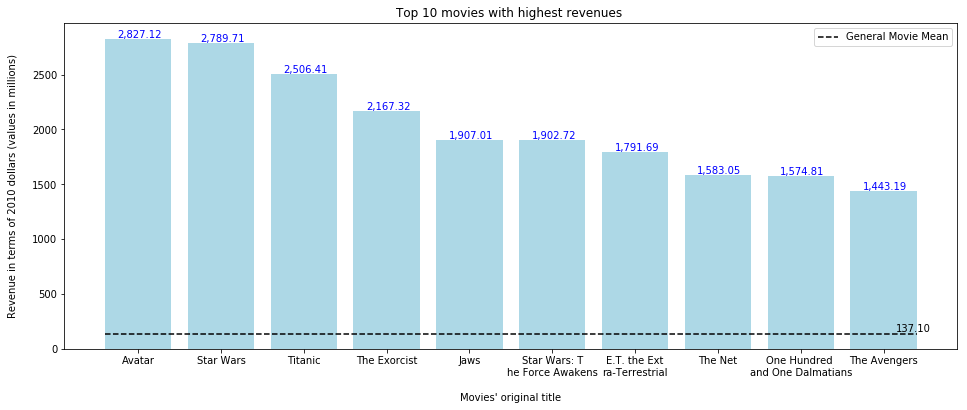

In [68]:
# Let's plot our Top 10 of movies based of revenues
func_bar1(top_10['original_title'], top_10['revenue_adj']/1e6, 'Top 10 movies with highest revenues ', 'Movies\' original title', 'Revenue in terms of 2010 dollars (values in millions)', 0.25, 10, 12, aver_rev/1e6, 'General Movie Mean')

In [69]:
# Let's check how higher is 'Avatar' movie's revenue compared to the general mean
avengers_rev = top_10[top_10['original_title']=='Avatar']['revenue_adj'] 
diff_revenue = (avengers_rev - aver_rev)/aver_rev
diff_revenue

0    19.621283
Name: revenue_adj, dtype: float64

In our clean dataset, the movie with the highest revenue is Avatar, with a revenue of 2.8 billon dollars (in terms of 2010 dollars). <br>This movie had a revenue almost 20 times higher than the general average.

### MULTIVARIATE ANALYSIS

### 1. Has the movies' annual revenue increased trough the years?

In [70]:
# Let's select the data to plot
ej2 = (df.groupby('release_year')['revenue_adj'].sum())/1e9

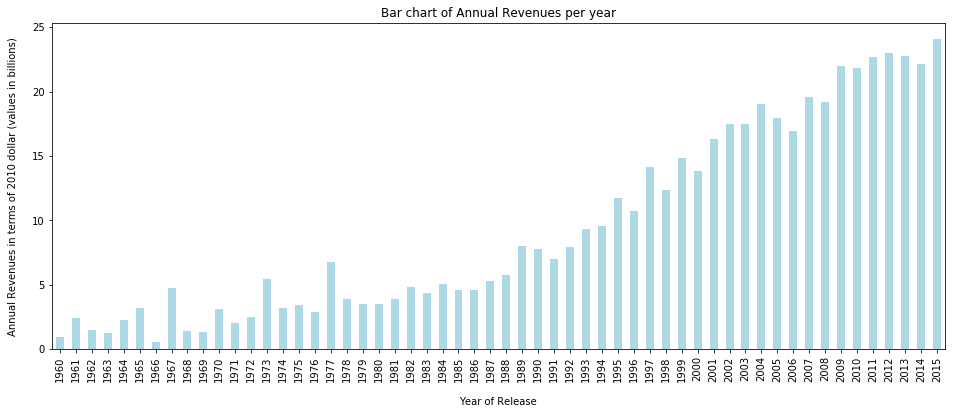

In [71]:
# Let's plot the bar chart
func_bar(ej2, 'Bar chart of Annual Revenues per year', 'Year of Release', 'Annual Revenues in terms of 2010 dollar (values in billions)')

In [72]:
# Let's see how much more annual revenue the movies received in 2015 compared to 1960
diff = (ej2[2015] - ej2[1960]) / ej2[1960]
diff

24.344779282412414

From the bar chart above we can see that, in our clean dataset, the amount of annual revenue (in terms of 2010 dollars) of movies has increased through the years. For example, the annual revenue of 2015 is 24 times higher than the annual revenue of 1960.

### 2. What properties are associated with movies that have higher revenues?

We will first separate the movies with the highest revenues. <br>
In order to do that, for our minimum cut we will use the median instead of the mean, as there are too many outliers with high values.

In [73]:
# Let's create a table for movies with higher revenue
high_rev = df[df['revenue_adj'] >= df['revenue_adj'].median()]

# Let's check the filter worked
(high_rev['revenue_adj']/1e6).min()

61.742744959049503

In [74]:
# Let's define a scatter matrix function
def func_scatter_matrix(X, title):
    axes = pd.plotting.scatter_matrix(X, alpha = 0.9, figsize = (16, 16), diagonal = 'kde', color='lightblue')
    plt.suptitle(title, y=0.9)
    
    # Adding the corelation coefficient
    corr = X.corr().values
    for i, v in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, v].annotate("r: %.4f" %corr[i,v], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center', color='black')

    return plt.show();

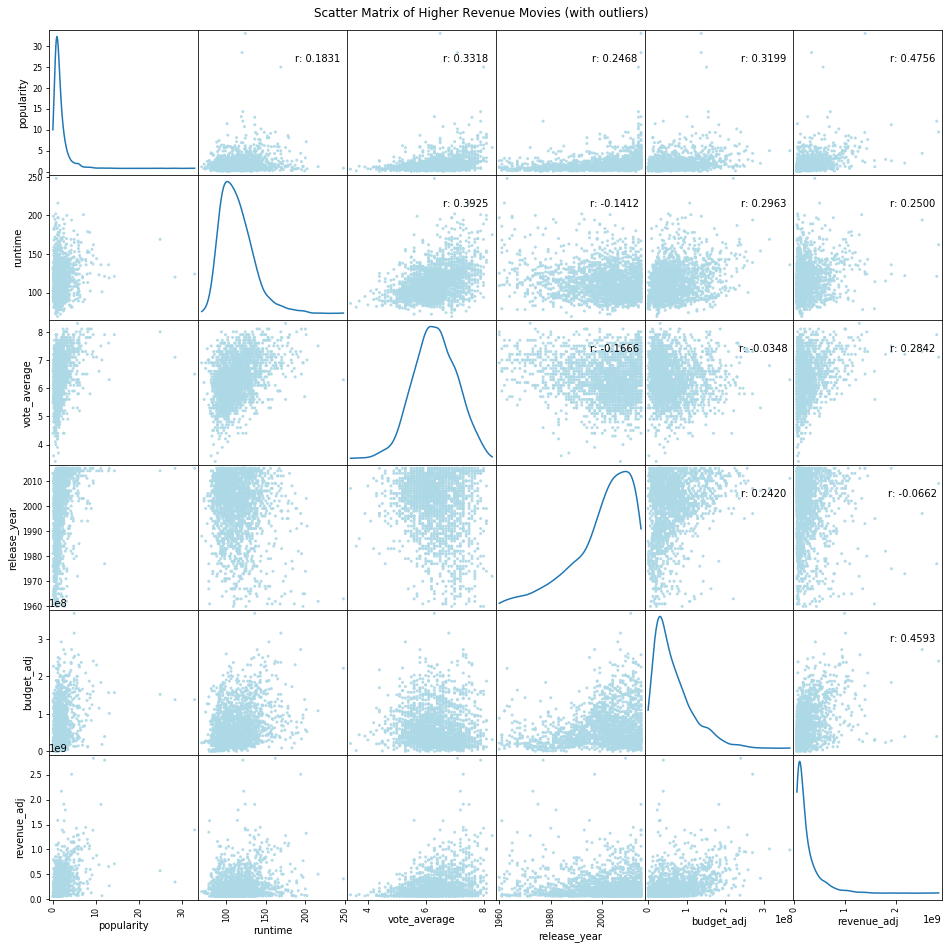

In [75]:
# Let's create a scatter matrix to analyze the numerical variables of these higher revenues
func_scatter_matrix(high_rev, 'Scatter Matrix of Higher Revenue Movies (with outliers)')

In this scatter matrix, we can spot a weak positive correlation between the following variables:
- budget_adj vs revenue_adj (r: 0.4593)
- popularity vs revenue_adj (r: 0.4756)
- runtime vs vote_average (r: 0.3925)

However, we don't see any strong linear correlation between any numerical values and higher revenues (in terms of 2010 dollars).<br>
<br>
We then proceed to analyze the data without the outliers to check if it affects the results.

In [76]:
# Let's calculate the IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

popularity      9.057940e-01
runtime         2.400000e+01
vote_average    1.000000e+00
release_year    1.500000e+01
budget_adj      4.752254e+07
revenue_adj     1.448710e+08
dtype: float64


In [77]:
# Let's select only the numerical columns
num_col = ['popularity', 'runtime', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj'] 

# Let's create a table for movies without the outliers
df_wo_out = df[~((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Let's check the table was created successfully
df_wo_out.shape

(3103, 10)

Note that around 700 rows considered outliers were dropped.

In [78]:
# Let's select only the highest revenue movies
high_rev1 = df_wo_out[df_wo_out['revenue_adj'] >= df['revenue_adj'].median()]

# Let's check the filter worked
(high_rev1['revenue_adj']/1e6).min()

61.742744959049503

Note that we still considered the median from the "df" table as our minimum high value, in order to make both scatter matrix comparable.

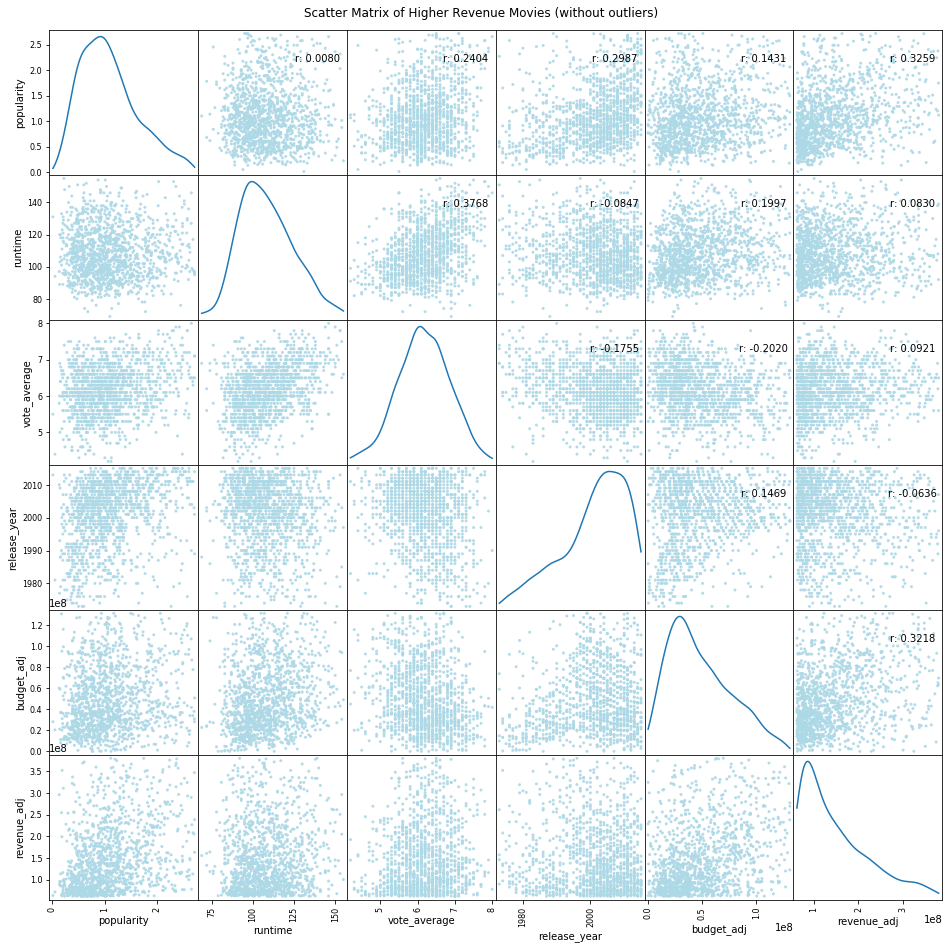

In [79]:
# Let's create a scatter matrix to analyze the numerical variables of these higher revenues (without outliers)
func_scatter_matrix(high_rev1, 'Scatter Matrix of Higher Revenue Movies (without outliers)')

In this new scatter matrix, we can spot some weak linear correlations between the following variables:
- budget_adj vs revenue_adj (r: 0.3218)
- popularity vs revenue_adj (r: 0.3259)
- runtime vs vote_average (r: 0.3768)

However, even after removing the outliers from our table, there is not strong linear correlation between any of the numerical variables and higher revenues (in terms of 2010 dollars).<br>

**Answering the questions:**<br>
2.1. Is budget associated with higher revenues? <br>
There is not a linear correlation between budget and higher revenues.<br><br>
2.2. Is popularity associated with higher revenues? <br>
There is not a linear correlation between popularity and higher revenues.<br><br>
2.3. Is vote_average associated with higher revenues? <br>
There is not a linear correlation between vote_average and higher revenues.<br><br>
2.4. Is runtime associated with higher revenues? <br>
There is not a linear correlation between runtime and higher revenues.<br><br>

### 3. How has the movies runtime changed through the years?

In [80]:
# Let's select the data to plot
ej3 = df.groupby('release_year')['runtime'].mean()
ej3.head(5)

release_year
1960    130.000000
1961    132.500000
1962    141.285714
1963    153.500000
1964    122.428571
Name: runtime, dtype: float64

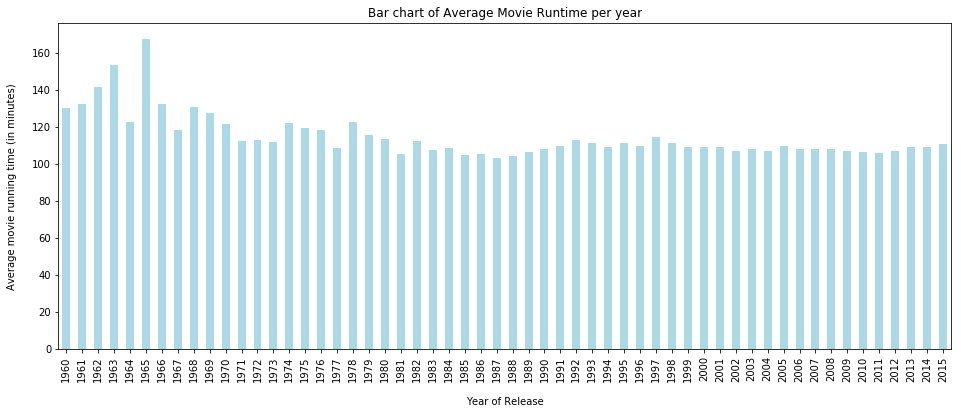

In [81]:
# Let's plot the bar chart
func_bar(ej3, 'Bar chart of Average Movie Runtime per year', 'Year of Release', 'Average movie running time (in minutes)')

Given the bar chart above, it looks like the average movie runtime (in our clean dataset) between 1960 and 1965 was higher than the rest of the year. 

<br>But, let's analyze if that changes when we remove the outliers.

In [82]:
# Let's select the data (without outliers) to plot
ej4 = df_wo_out.groupby('release_year')['runtime'].mean()
ej4.head(5)

release_year
1973    108.857143
1974    112.875000
1975    106.600000
1976    117.916667
1977     99.500000
Name: runtime, dtype: float64

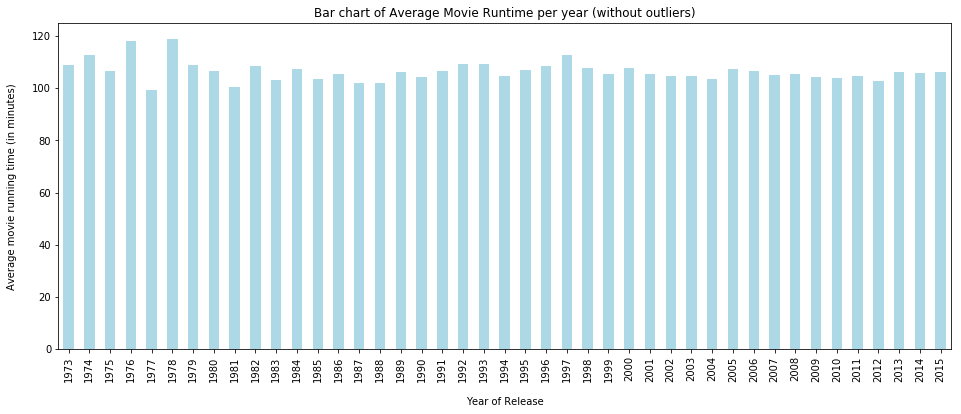

In [83]:
# Let's plot the new bar chart
func_bar(ej4, 'Bar chart of Average Movie Runtime per year (without outliers)', 'Year of Release', 'Average movie running time (in minutes)')

It looks like the average running time between 1960 and 1965 were in fact outliers. <br><br>
However, overall, it looks like the average movie runtime has not changed much through the years, in our clean dataset.

### 4. What properties are associated with popularity and vote average?

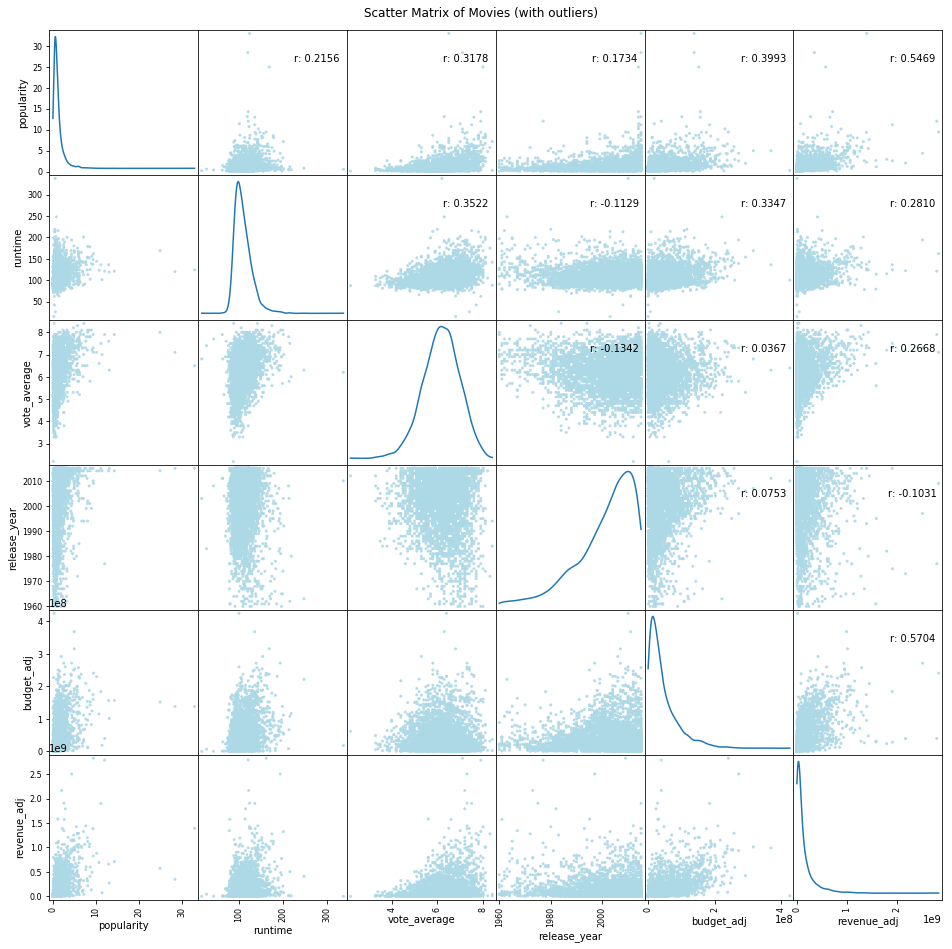

In [84]:
# Let's create a scatter matrix to analyze if there is any variable associated with popularity and vote average (with outliers)
func_scatter_matrix(df, 'Scatter Matrix of Movies (with outliers)')

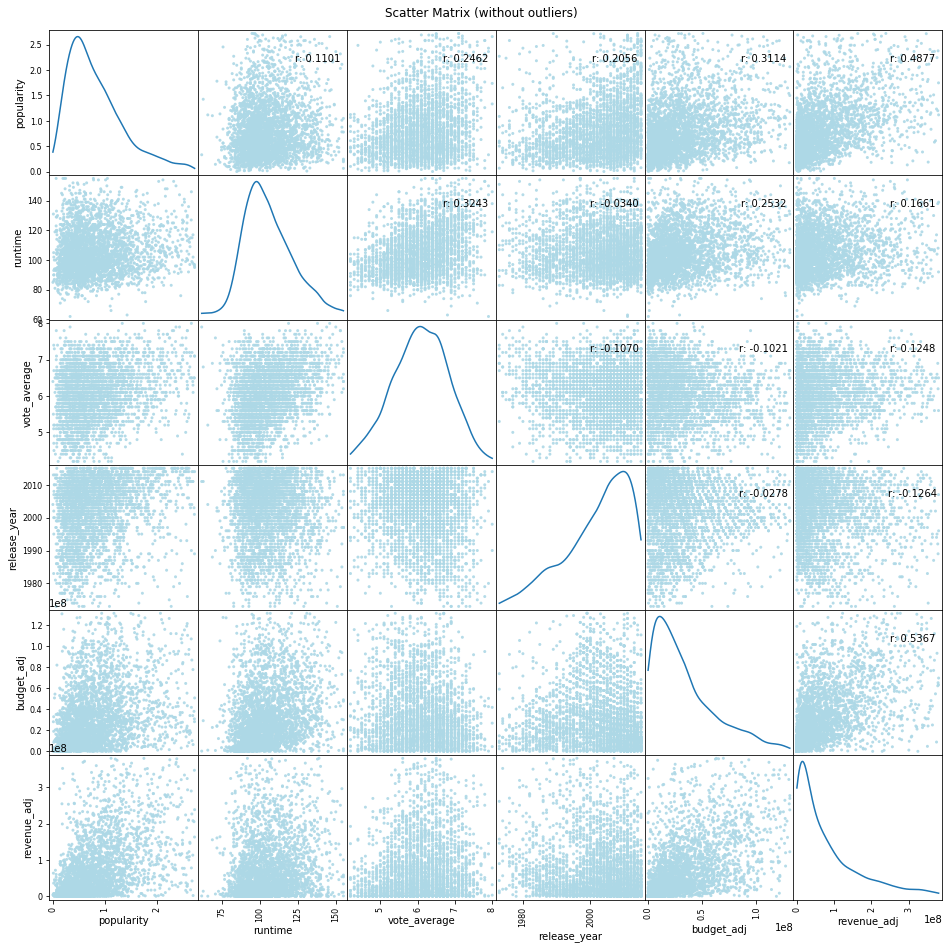

In [85]:
# Let's create a scatter matrix without outliers, to see if there is any change
func_scatter_matrix(df_wo_out, 'Scatter Matrix (without outliers)')

After analyzing the scatter matrix of the clean dataset, with and without outliers, it looks like there is not strong linear correlation between any of the numerical variables and popularity or vote_average.

**Answering the questions:**<br>
4.1. Is popularity associated with vote_average?<br>
There is not a linear correlation between popularity and vote_average.<br><br>
4.2. Is runtime associated with vote_average?<br>
There is not a linear correlation between runtime and vote_average.<br><br>
4.3. Is release_year associated with vote_average?<br>
There is not a linear correlation between release_year and vote_average.<br><br>
4.4. Is budget_adj associated with vote_average?<br>
There is not a linear correlation between budget_adj and vote_average.<br><br>
4.5. Is runtime associated with popularity?<br>
There is not a linear correlation between runtime and popularity.<br><br>
4.6. Is release_year associated with popularity?<br>
There is not a linear correlation between release_year and popularity.<br><br>
4.7. Is budget_adj associated with popularity?<br>
There is not a linear correlation between budget_adj and popularity.<br><br>


### 5. Do movies from certain director have higher popularity, higher vote_average or higher revenues?

In [86]:
# Let's check the average popularity in the movies of our clean dataset
aver_pop = df['popularity'].mean()
aver_pop

1.1918250228393459

In [87]:
# Let's find the top 5 directors with highest popularity in our clean dataset
pop_dir = df.groupby('director', as_index=False)['popularity'].mean()
pop_dir = pop_dir.sort_values(by=['popularity'], ascending=False).head(5)
pop_dir

director  popularity
276               Colin Trevorrow   16.696886
746       Joe Russo|Anthony Russo   12.971027
216   Chad Stahelski|David Leitch   11.422751
416       Don Hall|Chris Williams    8.691294
1138                Morten Tyldum    8.110711

In [88]:
# Let's check the average vote_average in the movies of our clean dataset
aver_vote = df['vote_average'].mean()
aver_vote

6.1682584998702321

In [89]:
# Let's find the top 5 directors with highest vote_average in our clean dataset
highvote_dir = df.groupby('director', as_index=False)['vote_average'].mean()
highvote_dir = highvote_dir.sort_values(by=['vote_average'], ascending=False).head(5)
highvote_dir

director  vote_average
291    Damien Chazelle           8.2
1704      Xavier Dolan           8.0
1227       Pete Docter           8.0
957   Lenny Abrahamson           8.0
1138     Morten Tyldum           8.0

In [90]:
# Let's check the average revenue_adj in the movies of our clean dataset
aver_rev = df['revenue_adj'].mean()
aver_rev

137097372.37865296

In [91]:
# Let's find the top 5 directors with highest revenue movies in our clean dataset
highrev_dir = df.groupby('director', as_index=False)['revenue_adj'].mean()
highrev_dir = highrev_dir.sort_values(by=['revenue_adj'], ascending=False).head(5)
highrev_dir

director   revenue_adj
620                                       Irwin Winkler  1.583050e+09
273   Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman  1.574815e+09
1318                                   Richard Marquand  1.253819e+09
227                             Chris Buck|Jennifer Lee  1.192711e+09
1388                           Roger Allers|Rob Minkoff  1.159592e+09

It's important to notice that we decided to keep the group of directors per row to check if there was any pattern in combination of directors that would stand out in the three analyses. However, the only director that appears in two top5 is Morten Tyldum.<br>
We then decided to separate directors in different rows to see if there is any change in the results.

In [92]:
# Sort dataframe based on revenue_adj
df.sort_values(by=['revenue_adj'], ascending=False)
df.head(10)

id  popularity                  original_title  \
1386    19995    9.432768                          Avatar   
1329       11   12.037933                       Star Wars   
5231      597    4.355219                         Titanic   
10594    9552    2.010733                    The Exorcist   
9806      578    2.563191                            Jaws   
3      140607   11.173104    Star Wars: The Force Awakens   
8889      601    2.900556      E.T. the Extra-Terrestrial   
8094     1642    1.136610                         The Net   
10110   12230    2.631987  One Hundred and One Dalmatians   
4361    24428    7.637767                    The Avengers   

                                                director  runtime  \
1386                                       James Cameron      162   
1329                                        George Lucas      121   
5231                                       James Cameron      194   
10594                                   William Friedkin      122   
9806                                    Steven Spielberg      124   
3                                            J.J. Abrams      136   
8889                                    Steven Spielberg      115   
8094                                       Irwin Winkler      114   
10110  Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman       79   
4361                                         Joss Whedon      143   

                                         genres  vote_average  release_year  \
1386   Action|Adventure|Fantasy|Science Fiction           7.1          2009   
1329           Adventure|Action|Science Fiction           7.9          1977   
5231                     Drama|Romance|Thriller           7.3          1997   
10594                     Drama|Horror|Thriller           7.2          1973   
9806                  Horror|Thriller|Adventure           7.3          1975   
3      Action|Adventure|Science Fiction|Fantasy           7.5          2015   
8889   Science Fiction|Adventure|Family|Fantasy           7.2          1982   
8094        Crime|Drama|Mystery|Thriller|Action           5.6          1995   
10110         Adventure|Animation|Comedy|Family           6.6          1961   
4361           Science Fiction|Action|Adventure           7.3          2012   

         budget_adj   revenue_adj  
1386   2.408869e+08  2.827124e+09  
1329   3.957559e+07  2.789712e+09  
5231   2.716921e+08  2.506406e+09  
10594  3.928928e+07  2.167325e+09  
9806   2.836275e+07  1.907006e+09  
3      1.839999e+08  1.902723e+09  
8889   2.372625e+07  1.791694e+09  
8094   3.148127e+07  1.583050e+09  
10110  2.917944e+07  1.574815e+09  
4361   2.089437e+08  1.443191e+09

In [93]:
# Selecting rows with just one director
one_dir = df[~df['director'].str.contains('\|')]

# Let's check the first 5 rows
one_dir.head(5)

id  popularity original_title          director  runtime  \
1386   19995    9.432768         Avatar     James Cameron      162   
1329      11   12.037933      Star Wars      George Lucas      121   
5231     597    4.355219        Titanic     James Cameron      194   
10594   9552    2.010733   The Exorcist  William Friedkin      122   
9806     578    2.563191           Jaws  Steven Spielberg      124   

                                         genres  vote_average  release_year  \
1386   Action|Adventure|Fantasy|Science Fiction           7.1          2009   
1329           Adventure|Action|Science Fiction           7.9          1977   
5231                     Drama|Romance|Thriller           7.3          1997   
10594                     Drama|Horror|Thriller           7.2          1973   
9806                  Horror|Thriller|Adventure           7.3          1975   

         budget_adj   revenue_adj  
1386   2.408869e+08  2.827124e+09  
1329   3.957559e+07  2.789712e+09  
5231   2.716921e+08  2.506406e+09  
10594  3.928928e+07  2.167325e+09  
9806   2.836275e+07  1.907006e+09

In [94]:
# Let's check the shape of "one_dir" table
one_dir.shape

(3610, 10)

In [95]:
# Selecting rows with more than one director
multi_dir = df[df['director'].str.contains('\|')]

# Let's check the first 5 rows
multi_dir.head(5)

id  popularity                  original_title  \
10110   12230    2.631987  One Hundred and One Dalmatians   
5422   109445    6.112766                          Frozen   
4180     8587    4.782688                   The Lion King   
8      211672    7.404165                         Minions   
6977      809    2.191033                         Shrek 2   

                                                director  runtime  \
10110  Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman       79   
5422                             Chris Buck|Jennifer Lee      102   
4180                            Roger Allers|Rob Minkoff       89   
8                               Kyle Balda|Pierre Coffin       91   
6977           Andrew Adamson|Kelly Asbury|Conrad Vernon       93   

                                          genres  vote_average  release_year  \
10110          Adventure|Animation|Comedy|Family           6.6          1961   
5422                  Animation|Adventure|Family           7.5          2013   
4180                      Family|Animation|Drama           7.7          1994   
8              Family|Animation|Adventure|Comedy           6.5          2015   
6977   Adventure|Animation|Comedy|Family|Fantasy           6.5          2004   

         budget_adj   revenue_adj  
10110  2.917944e+07  1.574815e+09  
5422   1.404050e+08  1.192711e+09  
4180   6.620002e+07  1.159592e+09  
8      6.807997e+07  1.064192e+09  
6977   1.731668e+08  1.061904e+09

In [96]:
# Let's check how many rows and columns are in this multi_dir table
multi_dir.shape

(243, 10)

In [97]:
# Let's check the maximum number of directors per movie we have in our clean dataset
n_dir = multi_dir['director'].str.count('\|').max() + 1
n_dir

12

Looks like a movie can have up to 12 directors in our clean dataset.

In [98]:
# Let's look where is that maximum number of directors
idmax = multi_dir['director'].str.count('\|').idxmax()
multi_dir.loc[idmax,].director

'Steven Brill|Elizabeth Banks|Steve Carr|Rusty Cundieff|James Duffy|Griffin Dunne|Peter Farrelly|Patrik Forsberg|James Gunn|Brett Ratner|Will Graham|Jonathan van Tulleken'

In [99]:
# Let's define a function that would only return one director (at a time) per movie
def single_dir(num_dir):
    dfx = multi_dir.copy(deep=True)
    if num_dir == -1:
        dfx['director']=dfx['director'].apply(lambda x: x.split('|')[-1])
    else:
        dfx['director']=dfx['director'].apply(lambda x: x.split('|')[num_dir : num_dir+1][0] if (len(x.split('|')[num_dir : num_dir+1]) > 0) else np.NaN)
    return dfx

In [100]:
# Let's define a function that creates a dataframe with directors separated (one director per row for every movie)
def create_df_singledir(num_dir):
    multi_dir_sep = pd.DataFrame(columns=list(multi_dir.columns))
    for i in range(1,num_dir+1):
        rows = single_dir(i*-1)
        multi_dir_sep = multi_dir_sep.append(rows, sort=False)
    return multi_dir_sep.reset_index(drop=True).dropna()

In [101]:
# Let's create our dataframe with multiple directors separated in one row each
multi_dir_separated = create_df_singledir(n_dir)

In [102]:
# Let's check top 5 rows of our new table
multi_dir_separated.sort_values(by=['revenue_adj'], ascending=False).head(5)

id  popularity                  original_title             director  \
0     12230    2.631987  One Hundred and One Dalmatians  Wolfgang Reitherman   
243   12230    2.631987  One Hundred and One Dalmatians       Hamilton Luske   
486   12230    2.631987  One Hundred and One Dalmatians       Clyde Geronimi   
1    109445    6.112766                          Frozen         Jennifer Lee   
244  109445    6.112766                          Frozen           Chris Buck   

    runtime                             genres  vote_average release_year  \
0        79  Adventure|Animation|Comedy|Family           6.6         1961   
243      79  Adventure|Animation|Comedy|Family           6.6         1961   
486      79  Adventure|Animation|Comedy|Family           6.6         1961   
1       102         Animation|Adventure|Family           7.5         2013   
244     102         Animation|Adventure|Family           7.5         2013   

       budget_adj   revenue_adj  
0    2.917944e+07  1.574815e+09  
243  2.917944e+07  1.574815e+09  
486  2.917944e+07  1.574815e+09  
1    1.404050e+08  1.192711e+09  
244  1.404050e+08  1.192711e+09

In [103]:
# Let's check there is not any duplicated value in our table
multi_dir_separated.duplicated().any()

False

In [104]:
# Let's append the multi_dir_separated table to one_dir table to begin our analysis
df_dir = one_dir.append(multi_dir_separated, sort=False)

# Let's see how many rows and columns are in our final table
df_dir.shape

(4164, 10)

Now that we have our table with the director separated, let's do our three top5 analyses once again.

In [105]:
# Let's find the top 5 directors with highest popularity in our clean dataset
pop_dir1 = df_dir.groupby('director', as_index=False)['popularity'].mean()
pop_dir1 = pop_dir1.sort_values(by=['popularity'], ascending=False).head(5)
pop_dir1

director  popularity
285     Colin Trevorrow   16.696886
222      Chad Stahelski   11.422751
365        David Leitch   11.422751
1201      Morten Tyldum    8.110711
269   Christopher Nolan    7.695094

In [106]:
# Let's find the top 5 directors with highest vote_average in our clean dataset.
highvote_dir1 = df_dir.groupby('director', as_index=False)['vote_average'].mean()
highvote_dir1 = highvote_dir1.sort_values(by=['vote_average'], ascending=False).head(5)
highvote_dir1

director  vote_average
301    Damien Chazelle           8.2
1773      Xavier Dolan           8.0
1708         Tony Kaye           8.0
1013  Lenny Abrahamson           8.0
1201     Morten Tyldum           8.0

In [107]:
# Let's find the top 5 directors with highest revenue movies in our clean dataset.
highrev_dir1 = df_dir.groupby('director', as_index=False)['revenue_adj'].mean()
highrev_dir1 = highrev_dir1.sort_values(by=['revenue_adj'], ascending=False).head(5)
highrev_dir1

director   revenue_adj
660      Irwin Winkler  1.583050e+09
626     Hamilton Luske  1.574815e+09
282     Clyde Geronimi  1.574815e+09
1387  Richard Marquand  1.253819e+09
754       Jennifer Lee  1.192711e+09

We see that the three top5 varies after separating one director per movie, but we dont see any director that is present in more than one top 5.<br>
Let's show our findings with graphs.

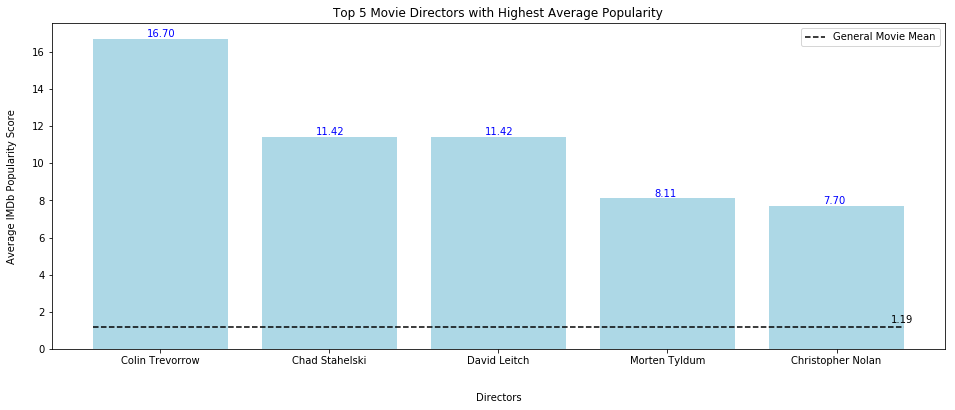

In [108]:
# Let's plot the Top 5 directors based on popularity
func_bar1(pop_dir1['director'], pop_dir1['popularity'], 'Top 5 Movie Directors with Highest Average Popularity', 'Directors', 'Average IMDb Popularity Score', 0.08, 0.1, 17, aver_pop, 'General Movie Mean')

In [109]:
# Let's check how more popular the movies from Colin Trevorrow, in average, are compared to the general mean
CT_pop = pop_dir1[pop_dir1['director']=='Colin Trevorrow']['popularity']
diff_pop = (CT_pop - aver_pop)/aver_pop
diff_pop

285    13.009512
Name: popularity, dtype: float64

In our clean dataset, director Colin Trevorrow has the highest average Popularity score in his movies, as the bar chart above shows.<br>
This director had an average popularity for his movies 13 times higher than the general average.

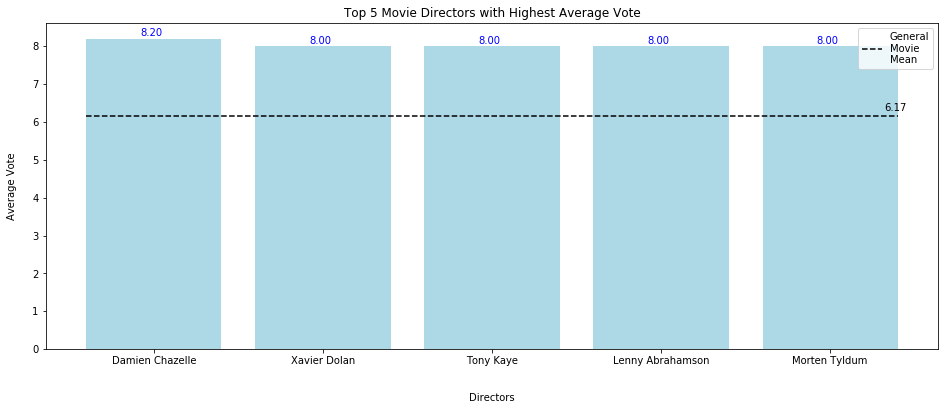

In [110]:
# Let's plot the Top 5 directors based on vote_average
func_bar1(highvote_dir1['director'], highvote_dir1['vote_average'], 'Top 5 Movie Directors with Highest Average Vote', 'Directors', 'Average Vote', 0.08, 0.06, 17, aver_vote, 'General\nMovie\nMean')

In [111]:
# Let's check how greater vote_average the movies from Damien Chazelle receive compared to the general mean
DC_vote = highvote_dir1[highvote_dir1['director']=='Damien Chazelle']['vote_average']
diff_vote = (DC_vote - aver_vote)/aver_vote
diff_vote

301    0.329387
Name: vote_average, dtype: float64

In our clean dataset, director Damien Chazelle has the highest average vote_average in his movies, as the bar chart above shows.<br>
However, his movies' average vote is just 33% higher than the general average.

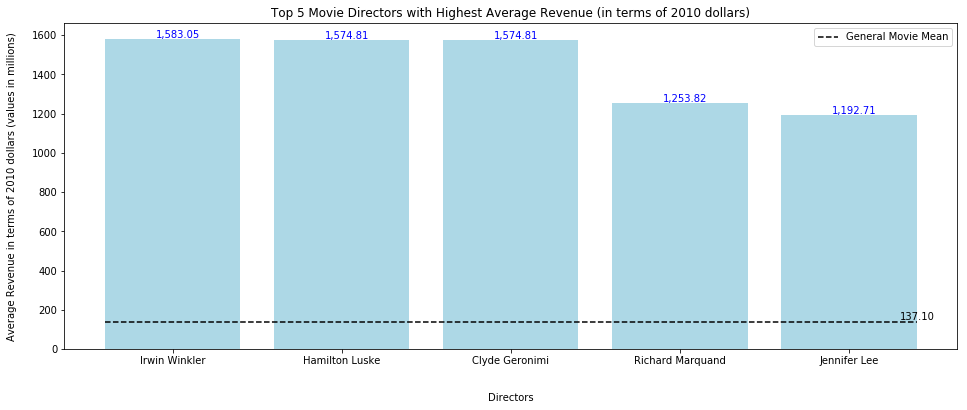

In [112]:
# Let's plot the Top 5 directors based on average_revenue
func_bar1(highrev_dir1['director'], highrev_dir1['revenue_adj']/1e6, 'Top 5 Movie Directors with Highest Average Revenue (in terms of 2010 dollars)', 'Directors', 'Average Revenue in terms of 2010 dollars (values in millions)', 0.1, 5, 17, aver_rev/1e6, 'General Movie Mean')

In [113]:
# Let's check how greater average revenue the movies from Irwin Winkler receive compared to the general mean
IW_rev = highrev_dir1[highrev_dir1['director']=='Irwin Winkler']['revenue_adj']
diff_rev = (IW_rev - aver_rev)/aver_rev
diff_rev

660    10.546899
Name: revenue_adj, dtype: float64

In our clean dataset, director Irwin Winkler has the highest average revenue (in terms of 2010 dollars) in his movies, as the bar chart above shows.<br>
This director has an average revenue 11 times higher than the general mean.

### 6. What's the distribution of amount of movies by genre?

Before starting the analysis, we will need to process the "genres" column so each movie has one genre per movie, but still has all of its genres present in the table.

In [114]:
# Selecting rows with just one genre
one_genre = df[~df['genres'].str.contains('\|')]

# Let's check the first 5 rows
one_genre.head(5)

id  popularity                      original_title  \
7073      615    0.672946           The Passion of the Christ   
9454      380    1.459821                            Rain Man   
25     177677    4.566713  Mission: Impossible - Rogue Nation   
6091     1374    1.149954                            Rocky IV   
10755     621    1.697618                              Grease   

                    director  runtime  genres  vote_average  release_year  \
7073              Mel Gibson      127   Drama           6.8          2004   
9454          Barry Levinson      133   Drama           7.4          1988   
25     Christopher McQuarrie      131  Action           7.1          2015   
6091      Sylvester Stallone       91   Drama           6.6          1985   
10755         Randal Kleiser      110   Music           7.0          1978   

         budget_adj   revenue_adj  
7073   3.463336e+07  7.064045e+08  
9454   4.609728e+07  6.542594e+08  
25     1.379999e+08  6.277435e+08  
6091   6.284215e+07  6.091101e+08  
10755  2.005620e+07  6.077490e+08

In [115]:
# Let's check how many rows and columns this one_genre table has
one_genre.shape

(649, 10)

In [116]:
# Selecting rows with more than one genre
multi_genre = df[df['genres'].str.contains('\|')]

# Let's check the first 5 rows
multi_genre.head(5)

id  popularity original_title          director  runtime  \
1386   19995    9.432768         Avatar     James Cameron      162   
1329      11   12.037933      Star Wars      George Lucas      121   
5231     597    4.355219        Titanic     James Cameron      194   
10594   9552    2.010733   The Exorcist  William Friedkin      122   
9806     578    2.563191           Jaws  Steven Spielberg      124   

                                         genres  vote_average  release_year  \
1386   Action|Adventure|Fantasy|Science Fiction           7.1          2009   
1329           Adventure|Action|Science Fiction           7.9          1977   
5231                     Drama|Romance|Thriller           7.3          1997   
10594                     Drama|Horror|Thriller           7.2          1973   
9806                  Horror|Thriller|Adventure           7.3          1975   

         budget_adj   revenue_adj  
1386   2.408869e+08  2.827124e+09  
1329   3.957559e+07  2.789712e+09  
5231   2.716921e+08  2.506406e+09  
10594  3.928928e+07  2.167325e+09  
9806   2.836275e+07  1.907006e+09

In [117]:
# Let's check how many rows and columns are in this multi_genre table
multi_genre.shape

(3204, 10)

In [118]:
# Let's check the maximum number of genres per movie we have in our clean dataset
n_gen = multi_genre['genres'].str.count('\|').max() + 1
n_gen

5

Looks like a movie can have up to 5 genres in our clean dataset.

In [119]:
# Let's look where is that maximum number of genres
idmax1 = multi_genre['genres'].str.count('\|').idxmax()
multi_genre.loc[idmax1,].genres

'Crime|Drama|Mystery|Thriller|Action'

In [120]:
# Let's define a function that would only return one genre (at a time) per movie
def single_genre(n_gen):
    dfx = multi_genre.copy(deep=True)
    if n_gen == -1:
        dfx['genres']=dfx['genres'].apply(lambda x: x.split('|')[-1])
    else:
        dfx['genres']=dfx['genres'].apply(lambda x: x.split('|')[n_gen : n_gen + 1][0] if (len(x.split('|')[n_gen : n_gen + 1]) > 0) else np.NaN)
    return dfx

In [121]:
# Let's define a function that creates a dataframe with genres separated (one genre per row for every movie)
def create_df_singlegen(n_gen):
    multi_genre_sep = pd.DataFrame(columns=list(multi_genre.columns))
    for i in range(1, n_gen + 1):
        rows = single_genre(i*-1)
        multi_genre_sep = multi_genre_sep.append(rows, sort=False)
    return multi_genre_sep.reset_index(drop=True).dropna()

In [122]:
# Let's create our dataframe with multiple genres separated in one row each
multi_genre_separated = create_df_singlegen(n_gen)

In [123]:
# Let's check the top 5 rows of our new table
multi_genre_separated.sort_values(by=['revenue_adj'], ascending=False).head(5)

id  popularity original_title       director runtime  \
0     19995    9.432768         Avatar  James Cameron     162   
9612  19995    9.432768         Avatar  James Cameron     162   
3204  19995    9.432768         Avatar  James Cameron     162   
6408  19995    9.432768         Avatar  James Cameron     162   
1        11   12.037933      Star Wars   George Lucas     121   

               genres  vote_average release_year    budget_adj   revenue_adj  
0     Science Fiction           7.1         2009  2.408869e+08  2.827124e+09  
9612           Action           7.1         2009  2.408869e+08  2.827124e+09  
3204          Fantasy           7.1         2009  2.408869e+08  2.827124e+09  
6408        Adventure           7.1         2009  2.408869e+08  2.827124e+09  
1     Science Fiction           7.9         1977  3.957559e+07  2.789712e+09

In [124]:
# Let's check there is not any duplicated value in our table
multi_genre_separated.duplicated().any()

False

In [125]:
# Let's append the multi_genre_separated table to one_genre table to begin our analysis
df_genre = one_genre.append(multi_genre_separated, sort=False)

# Let's see how many rows and columns are in our final table
df_genre.shape

(10299, 10)

Now that we have our table with the genres fixed, we begin our analysis for this question.

In [126]:
# Let's check how many unique genres we have
df_genre['genres'].nunique()

20

In [127]:
# Let's create a table that counts how many movies are per genre in our clean dataset
count_genre = df_genre.groupby('genres', as_index=False)['id'].count()
count_genre = count_genre.sort_values(by=['id'], ascending=False).reset_index(drop=True)
count_genre.rename(columns={'id':'count'}, inplace=True)
count_genre

genres  count
0             Drama   1755
1            Comedy   1357
2          Thriller   1204
3            Action   1085
4         Adventure    749
5           Romance    666
6             Crime    651
7   Science Fiction    519
8            Horror    463
9            Family    425
10          Fantasy    396
11          Mystery    344
12        Animation    201
13            Music    136
14          History    129
15              War    119
16          Western     52
17      Documentary     35
18          Foreign     12
19         TV Movie      1

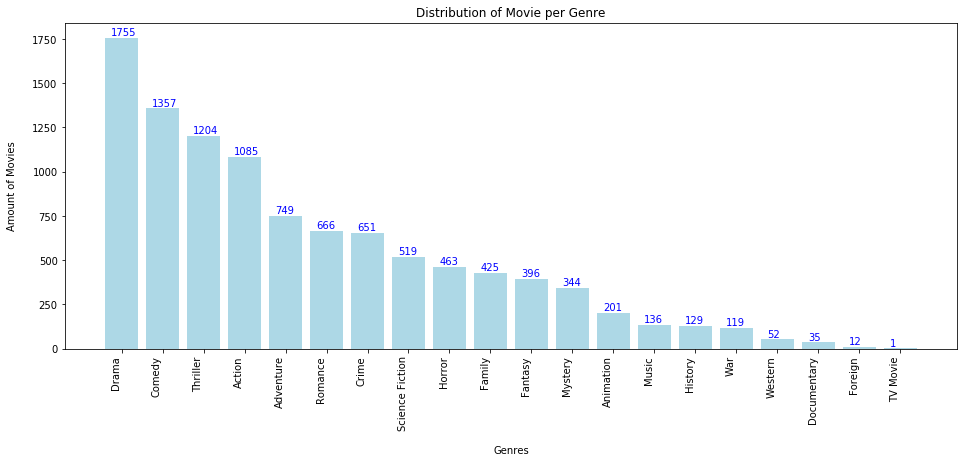

In [128]:
# Let's plot a bar chart to explain better our findings
func_bar1(count_genre['genres'], count_genre['count'], 'Distribution of Movie per Genre', 'Genres', 'Amount of Movies', 0.25, 15, 17,None,None)

In the bar chart above we can see that the Drama genre is the predominant one since it has the higher amount of movies that belong to that genre in our clean dataset.

### 7. Is certain genre associated with higher popularity, higher vote_average or higher revenues?

In [129]:
# Let's find the top 5 genres with highest popularity in our clean dataset.
pop_gen = df_genre.groupby('genres', as_index=False)['popularity'].mean()
pop_gen = pop_gen.sort_values(by=['popularity'], ascending=False).head(5)
pop_gen

genres  popularity
15  Science Fiction    1.873294
1         Adventure    1.867693
8           Fantasy    1.754315
2         Animation    1.710622
0            Action    1.567116

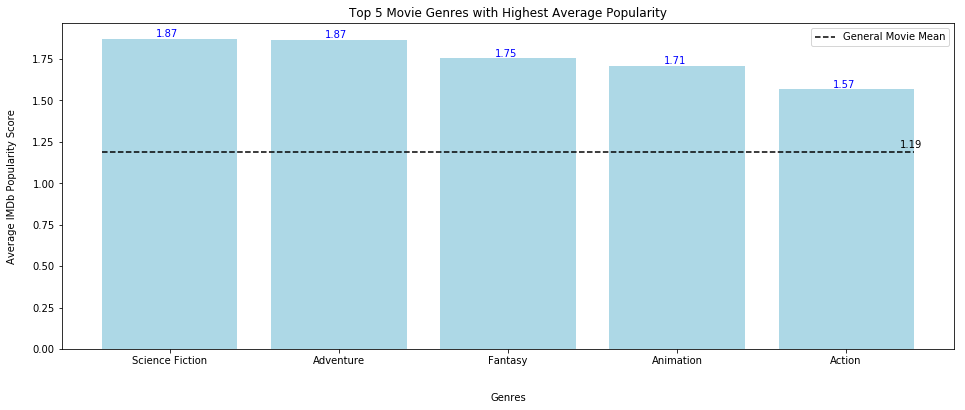

In [130]:
# Let's plot our Top 5 Genres by popularity
func_bar1(pop_gen['genres'], pop_gen['popularity'], 'Top 5 Movie Genres with Highest Average Popularity', 'Genres', 'Average IMDb Popularity Score', 0.08, 0.01, 17, aver_pop, 'General Movie Mean')

In [131]:
# Let's check how more popular the SciFi and Adventure movies, in average, are compared to the general mean
SFA_pop = pop_gen[pop_gen['genres']=='Science Fiction']['popularity']
diff_pop = (SFA_pop - aver_pop)/aver_pop
diff_pop

15    0.571786
Name: popularity, dtype: float64

From the bar chart above, we can see that movies from the Adventure and Science Fiction genres have the highest average Popularity score, in our clean dataset. The movies of these two genres had an average popularity 57% higher than the general average.

In [132]:
# Let's find the top 5 genres with highest vote_average in our clean dataset
highvote_gen = df_genre.groupby('genres', as_index=False)['vote_average'].mean()
highvote_gen = highvote_gen.sort_values(by=['vote_average'], ascending=False).head(5)
highvote_gen

genres  vote_average
5   Documentary      6.660000
18          War      6.586555
10      History      6.578295
19      Western      6.467308
6         Drama      6.397094

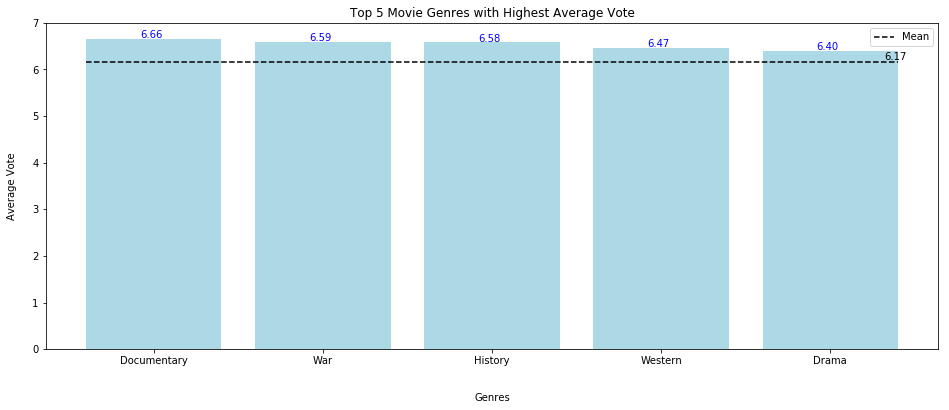

In [133]:
# Let's plot our Top 5 Genres by vote_average
func_bar1(highvote_gen['genres'], highvote_gen['vote_average'], 'Top 5 Movie Genres with Highest Average Vote', 'Genres', 'Average Vote', 0.08, 0.02, 17, aver_vote, 'Mean')

In [134]:
# Let's check how greater vote_average the Documentary movies receive compared to the general mean
doc_vote = highvote_gen[highvote_gen['genres']=='Documentary']['vote_average']
diff_vote = (doc_vote - aver_vote)/aver_vote
diff_vote

5    0.079721
Name: vote_average, dtype: float64

From the bar chart above, we can see that movies from the Documentary genre have the highest average vote_average, in our clean dataset.<br>
However, movies' from this genre have an average vote just 7% higher than the general average.

In [135]:
# Let's find the top 5 genres with highest revenue in our clean dataset.
highrev_gen = df_genre.groupby('genres', as_index=False)['revenue_adj'].mean()
highrev_gen = highrev_gen.sort_values(by=['revenue_adj'], ascending=False).head(5)
highrev_gen

genres   revenue_adj
2         Animation  2.909574e+08
1         Adventure  2.714075e+08
8           Fantasy  2.499928e+08
7            Family  2.437910e+08
15  Science Fiction  2.021531e+08

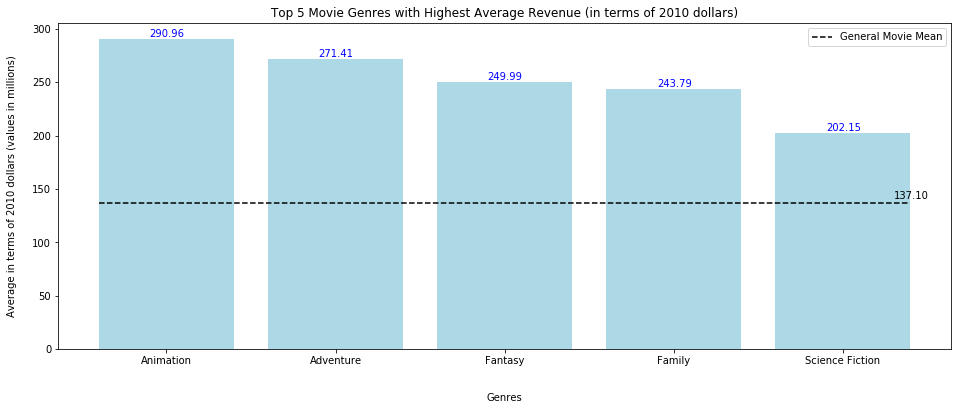

In [136]:
# Let's plot the Top 5 genres based on revenue_adj
func_bar1(highrev_gen['genres'], highrev_gen['revenue_adj']/1e6, 'Top 5 Movie Genres with Highest Average Revenue (in terms of 2010 dollars)', 'Genres', 'Average in terms of 2010 dollars (values in millions)', 0.1, 2, 17, aver_rev/1e6, 'General Movie Mean')

In [137]:
# Let's check how greater average revenue the Animation movies receive compared to the general mean
AN_rev = highrev_gen[highrev_gen['genres']=='Animation']['revenue_adj']
diff_rev = (AN_rev - aver_rev)/aver_rev
diff_rev

2    1.122268
Name: revenue_adj, dtype: float64

From the bar chart above, we see that movies from the Animation genre have the highest average revenue (in terms of 2010 dollars), in our clean dataset.<br>
Also, movies from this genre have an average revenue 112% higher than the general mean.

### 8. Which genres are the most predominant from year to year?

In [138]:
# Let's create a table that counts the amount of movies per genre per year
count_gen_year = df_genre.groupby(['release_year','genres'], as_index=False)['id'].count()
count_gen_year.rename(columns={'id':'count'}, inplace=True)
count_gen_year.head(5)

release_year     genres  count
0          1960     Action      2
1          1960  Adventure      1
2          1960     Comedy      2
3          1960      Drama      3
4          1960    History      1

In [139]:
# Let's reshape our count_gen_year table for our plot
table1 = count_gen_year.pivot(index='release_year', columns='genres', values='count')
table1 = table1.fillna(0)
table1.head(5)

genres        Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  \
release_year                                                                    
1960             2.0        1.0        0.0     2.0    0.0          0.0    3.0   
1961             2.0        2.0        1.0     4.0    1.0          0.0    6.0   
1962             2.0        3.0        0.0     0.0    1.0          0.0    5.0   
1963             2.0        2.0        0.0     1.0    0.0          0.0    3.0   
1964             1.0        1.0        0.0     3.0    1.0          0.0    4.0   

genres        Family  Fantasy  Foreign  History  Horror  Music  Mystery  \
release_year                                                              
1960             0.0      0.0      0.0      1.0     1.0    0.0      0.0   
1961             2.0      0.0      0.0      1.0     1.0    1.0      0.0   
1962             0.0      0.0      0.0      1.0     0.0    0.0      0.0   
1963             0.0      0.0      0.0      3.0     1.0    0.0      1.0   
1964             2.0      1.0      0.0      0.0     0.0    3.0      1.0   

genres        Romance  Science Fiction  TV Movie  Thriller  War  Western  
release_year                                                              
1960              2.0              0.0       0.0       1.0  0.0      1.0  
1961              1.0              0.0       0.0       0.0  1.0      1.0  
1962              0.0              0.0       0.0       1.0  1.0      2.0  
1963              2.0              0.0       0.0       3.0  1.0      0.0  
1964              2.0              0.0       0.0       2.0  1.0      0.0

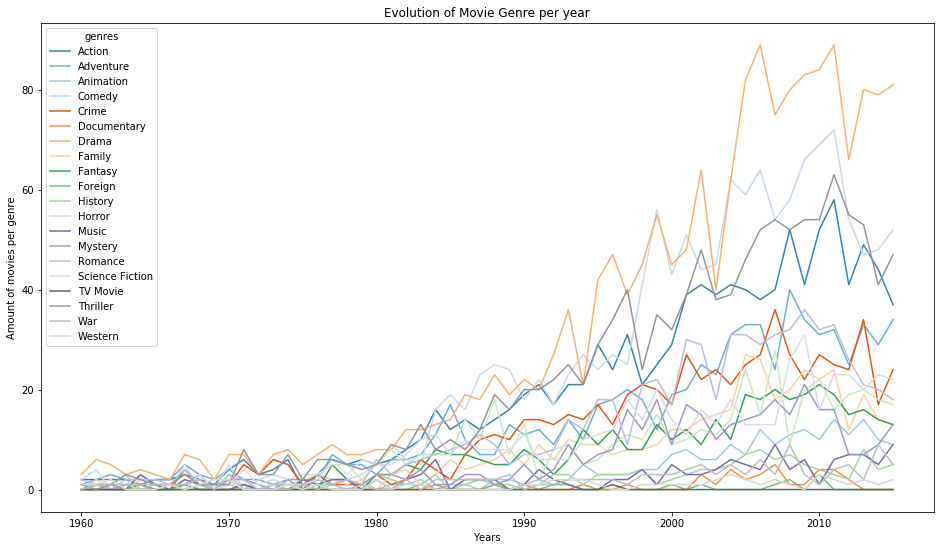

In [140]:
# Let's do our plot
table1.plot(figsize=(16, 9), title='Evolution of Movie Genre per year', cmap='tab20c')
plt.ylabel("Amount of movies per genre")
plt.xlabel("Years");

This graph is confusing given the amount of genres displaying, but we can spot that the Drama genre is somehow predominant through the mayority of the years.

In [141]:
# Let's check the amount of movies per genre in 2015 
table1.tail(1)

genres        Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  \
release_year                                                                    
2015            37.0       34.0        9.0    52.0   24.0          0.0   81.0   

genres        Family  Fantasy  Foreign  History  Horror  Music  Mystery  \
release_year                                                              
2015            13.0     13.0      0.0      5.0    17.0    9.0     13.0   

genres        Romance  Science Fiction  TV Movie  Thriller  War  Western  
release_year                                                              
2015             18.0             22.0       0.0      47.0  5.0      2.0

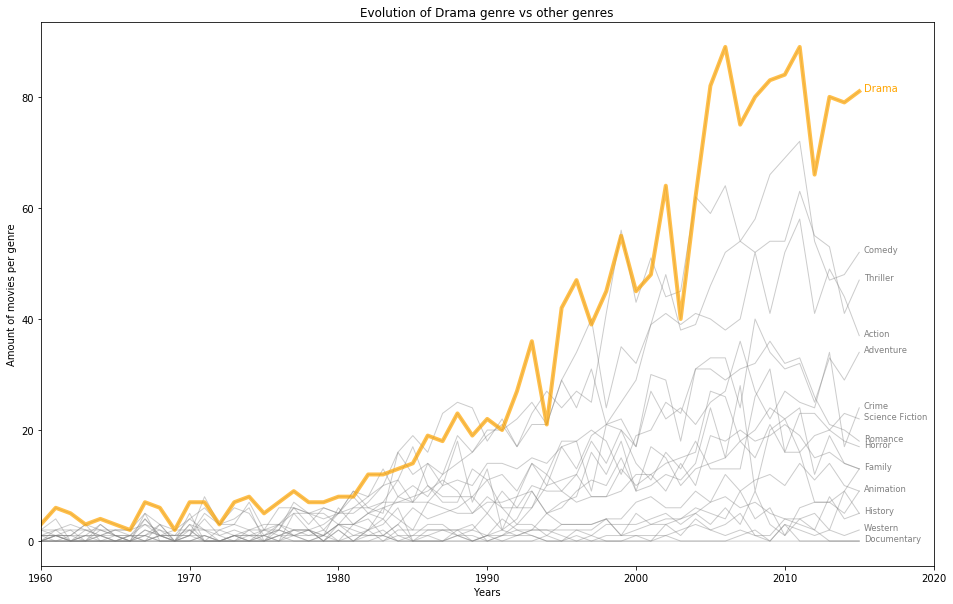

In [142]:
# Let's do a plot showcasing "Drama" genre
fig, ax = plt.subplots(figsize=(16,10))
 
# Multiple line plot
for column in table1:
    plt.plot(table1.index, table1[column], marker='', color='grey', linewidth=1, alpha=0.4)
    
#Now we re do the 'Drama' curve, but bigger with distinct color
plt.plot(table1.index, table1['Drama'], marker='', color='orange', linewidth=4, alpha=0.7)

# Annotate the plot
num = 0
heights=[]
for i in table1.values[-1].tolist(): 
    name = list(table1)[num]
    
    #We will avoid genre labels overlapping by only showing the first genre in alphabetical order
    if i not in heights:
        heights.append(i)
        if name != 'Drama':
            ax.text(list(table1.index)[-1]+0.3, i, name, horizontalalignment='left', size='small', color='grey')   
    num += 1
# Add a special annotation for the 'Drama' genre
ax.text(list(table1.index)[-1]+0.3, list(table1['Drama'].values)[-1], 'Drama', horizontalalignment='left', color='orange')

# Add titles and labels
plt.title("Evolution of Drama genre vs other genres")
plt.xlabel("Years")
plt.ylabel("Amount of movies per genre")

# Seting x axis limits
ax.set_xlim(list(table1.index)[0], list(table1.index)[-1]+5)
plt.show();

In the line plot above we can see that the "Drama" genre has been predominant among other movie genres through the years, in our clean dataset.

### 9. Which genres are most popular from year to year?

To analyze which genre is the most popular through the years, we will use the IMDb Popularity Score as it takes into account more factors than the "vote_average" column.

In [143]:
# Let's create a table that gets the average popularity score per genre per year
avg_pop_year = df_genre.groupby(['release_year','genres'], as_index=False)['popularity'].mean()
avg_pop_year.rename(columns={'popularity':'avg_pop'}, inplace=True)
avg_pop_year.head(5)

release_year     genres   avg_pop
0          1960     Action  1.504538
1          1960  Adventure  1.872132
2          1960     Comedy  0.501564
3          1960      Drama  1.564871
4          1960    History  1.136943

In [144]:
# Let's reshape our avg_pop_year table for our plot
table2 = avg_pop_year.pivot(index='release_year', columns='genres', values='avg_pop')
table2 = table2.fillna(0)
table2.head(5)

genres          Action  Adventure  Animation    Comedy     Crime  Documentary  \
release_year                                                                    
1960          1.504538   1.872132   0.000000  0.501564  0.000000          0.0   
1961          0.464139   1.693268   2.631987  1.244521  0.900245          0.0   
1962          1.848380   1.621842   0.000000  0.000000  0.810805          0.0   
1963          1.357698   1.586280   0.000000  0.920094  0.000000          0.0   
1964          3.153791   3.153791   0.000000  1.670163  0.663446          0.0   

genres           Drama    Family   Fantasy  Foreign   History    Horror  \
release_year                                                              
1960          1.564871  0.000000  0.000000      0.0  1.136943  2.610362   
1961          0.753022  1.467885  0.000000      0.0  0.538364  0.249542   
1962          0.641333  0.000000  0.000000      0.0  1.168767  0.000000   
1963          0.558673  0.000000  0.000000      0.0  0.558673  1.139321   
1964          0.922681  1.310850  1.987819      0.0  0.000000  0.000000   

genres           Music   Mystery   Romance  Science Fiction  TV Movie  \
release_year                                                            
1960          0.000000  0.000000  0.501564              0.0       0.0   
1961          0.900245  0.000000  1.752027              0.0       0.0   
1962          0.000000  0.000000  0.000000              0.0       0.0   
1963          0.000000  0.920094  0.862313              0.0       0.0   
1964          1.144632  0.663446  0.408402              0.0       0.0   

genres        Thriller       War   Western  
release_year                                
1960          2.610362  0.000000  1.872132  
1961          0.000000  0.754548  0.173731  
1962          3.170651  1.168767  0.516593  
1963          1.364218  0.664326  0.000000  
1964          1.908618  2.210475  0.000000

In [145]:
# Let's check the populary score by genre in 2015
table2.tail(1)

genres          Action  Adventure  Animation    Comedy     Crime  Documentary  \
release_year                                                                    
2015          5.412644   5.864179   3.169796  2.112686  2.901992          0.0   

genres           Drama    Family   Fantasy  Foreign   History    Horror  \
release_year                                                              
2015          2.041339  3.373933  3.326239      0.0  2.258394  1.505638   

genres          Music   Mystery  Romance  Science Fiction  TV Movie  Thriller  \
release_year                                                                    
2015          1.39139  2.668201  2.10803         7.594638       0.0  3.913396   

genres             War  Western  
release_year                     
2015          1.943238  7.50455

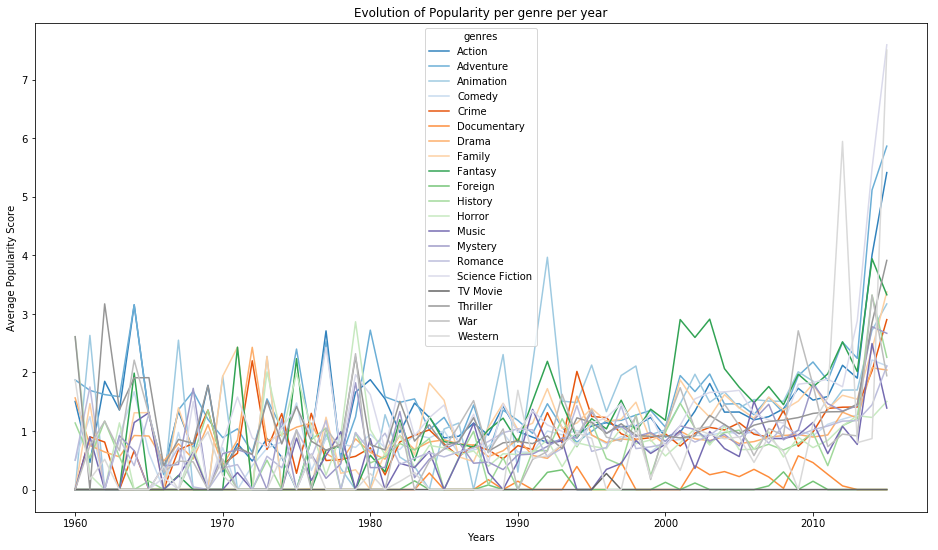

In [146]:
# Let's do our plot
table2.plot(figsize=(16, 9), title='Evolution of Popularity per genre per year', cmap='tab20c')
plt.ylabel("Average Popularity Score")
plt.xlabel("Years");

In the graph above we can see that it's difficult to distinguish which movie was more popular than others throughout the years, as the popularity per movie varies a lot from year to year.<br>
However, let's showcase Animation, as it had the highest average popularity (among all years), and Science Fiction, as it had the highest average popularity in 2015.

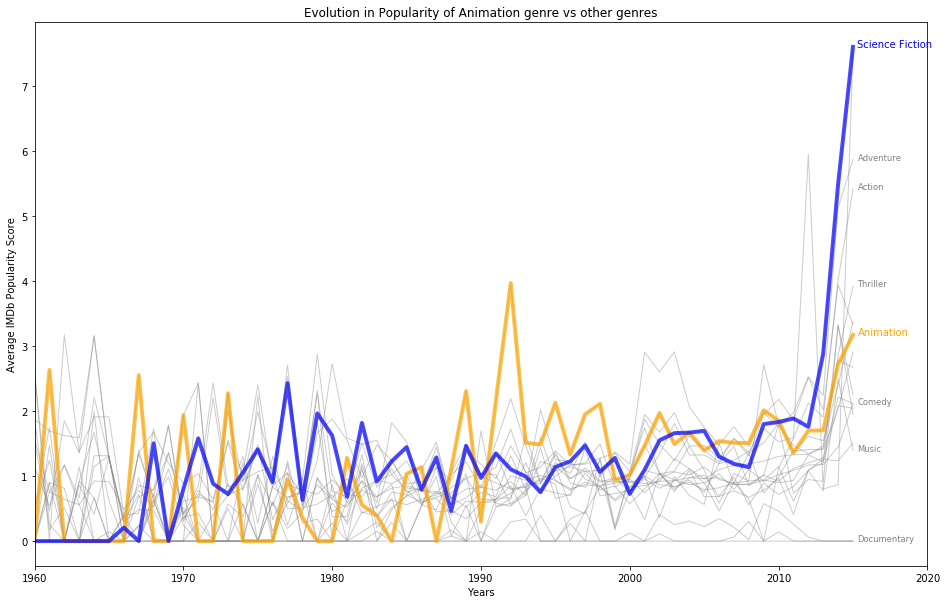

In [147]:
# Let's do a plot showcasing "Animation" and "Science Fiction" genre
fig, ax = plt.subplots(figsize=(16,10))
 
# Multiple line plot
for column in table2:
    plt.plot(table2.index, table2[column], marker='', color='grey', linewidth=1, alpha=0.4)
    
# Re do the "Animation" curve, but bigger with distinct color
plt.plot(table2.index, table2['Animation'], marker='', color='orange', linewidth=4, alpha=0.7)

# Re do the "Science Fiction" curve, but bigger with distinct color
plt.plot(table2.index, table2['Science Fiction'], marker='', color='blue', linewidth=4, alpha=0.7)

# Annotate the plot
num = 0
heights=[]
for i in table2.values[-1].tolist(): 
    name = list(table2)[num]
    
# Avoid genre labels overlapping by only showing the first genre of the same 2015 value (rounded), in alphabetical order
    if round(i,0) not in heights:
        heights.append(round(i,0))
        if name != 'Animation' and name != 'Science Fiction':
            ax.text(list(table2.index)[-1]+0.3, i, name, horizontalalignment='left', size='small', color='grey')
    num +=1
    
# Add a special annotation for the "Animation" genre
ax.text(list(table2.index)[-1]+0.3, list(table2['Animation'].values)[-1], 'Animation', horizontalalignment='left', color='orange')

# Add a special annotation for the "Science Fiction" genre
ax.text(list(table2.index)[-1]+0.3, list(table2['Science Fiction'].values)[-1], 'Science Fiction', horizontalalignment='left', color='blue')

# Add titles and labels
plt.title("Evolution in Popularity of Animation genre vs other genres")
plt.xlabel("Years")
plt.ylabel("Average IMDb Popularity Score")

# Seting x axis limits
ax.set_xlim(list(table2.index)[0], list(table2.index)[-1]+5)
plt.show();

In the line plot above we can see that even though Animation had the highest average popularity score among all genres, in our clean dataset, there are years that its movies had zero score. This is probably related to that fact that there wasn't any Animation release during those years between the 60s and 90s.<br>
On the other hand, we can see that Science Fiction also had some years with zero popularity score. This is also probably related that there weren't movies in that genre during some years in the 60s.<br>
Both genres show a lot of variability through the years.

<a id='conclusions'></a>
## Conclusions

From the univariate and multivariate analysis, we can conclude the following **from our clean dataset**:
- The mayority of movies (between 25% and 75% percentile) had a budget between 13.1 and 60.6 millions of dollars.
- The mayority of movies (between 25% and 75% percentile) had a revenue between 18.4 and 163.3 millions of dollars.
- The mayority of movies (between 25% and 75% percentile) had a popularity score between 0.5 and 1.4.
- The mayority of movies (between 25% and 75% percentile) had a vote average between 5.7 and 6.7 points.
- The mayority of movies (between 25% and 75% percentile) had a running time between 95 and 119 minutes.
- The amount of movies released per year has increased through the years. For example, the amount of movies released in 2015 is 31 times higher than the amount released in 1960.
- The movie with the highest revenue is Avatar, with a revenue of 2.8 billon dollars (in terms of 2010 dollars). This movie had a revenue almost 20 times higher than the general average.
- The amount of annual revenue (in terms of 2010 dollars) of movies has increased through the years. For example, the annual revenue of 2015 is 24 times higher than the annual revenue of 1960.
- Overall, the average movie runtime has not changed much through the years
- Director Colin Trevorrow has the highest average Popularity score in his movies. This director had an average popularity for his movies 13 times higher than the general average.
- Director Irwin Winkler has the highest average revenue (in terms of 2010 dollars) in his movies. This director has an average revenue 11 times higher than the general mean.
- Movies from the Adventure and Science Fiction genres have the highest average Popularity score. The movies of these two genres had an average popularity 57% higher than the general average.
- Movies from the Animation genre have the highest average revenue (in terms of 2010 dollars). Movies from this genre have an average revenue 112% higher than the general mean.
- The Drama genre has the higher amount of movies (in total) that belong to that genre. This trend is also visible through the years.

Limitations of this Project:
- This project does not include sentiment analysis, natural language process or text process. For example the columns "tagline", "keywords" and "overview" had to be removed because sentiment analysis is not in the scope of this project. However, a NLP and text analysis would be insightful for further analysis.
- This dataset does not specify the country of each movie, so the analysis is limited in geographical terms. Questions like: "which countries produced the highest revenues movies?" cannot be answered because of that lack of information.
- This dataset does not include information about the genre of each actor/actress or the payment they received per movie. So questions like: "Do actors or actresses receive more payment per movie?", and "how payment per genre has varied through the year?" cannot be answered in this project.
- Since there is no specification that this dataset includes ALL the movies released between 1960 and 2015, the conclusions of this analysis will be in terms of the dataset as population, and not "worlwide" or any other scope.
- There were categorical missing values (in columns "genres" and "director") we could not complete and had to be removed due to lack of automated web scrapping knowledge.
- The column "cast" had to be removed as there is no information about which actor/actress is the lead or support one in the data provided. So questions like: "Do movies with certain actors or actresses as leads receive higher popularity, higher vote_average or higher revenue?", and "What are the top actors/actress from year to year?" could not be answered.
- The column "production_companies" will also be dropped as there is no information about the role of each production company in the making of the film (for example: production, distribution, shares, etc.) to compliment the analysis. So questions like: "Do releases from certain production companies are associated with higher popularity, higher vote_average or higher revenues?" could not be answered.
- 64% of data could not be analyzed because there was zero value in either "budget_adj" or "revenue_adj".
- We chose the "auto" method to select the number of bins of histogram charts. These auto method chooses the maximum number of bins between the "Sturges" and "Freedman Diaconis" estimators. However, since there is not one single best method to find the number of bins of a histogram, the graph could look different with a different method to choose the number of bins.
- We kept the default values for kernell (gaussian method) and binwidth (scott method) for the density plot. However, the graph could look different with a different choice of method.
- For question 2 we only analyzed the linear correlation of data, however there are other types of correlations we could use, but they are not part of the scope for this project

References:
- Pandas documentation: https://pandas.pydata.org/pandas-docs/stable/reference/index.html
- Numpy documentation: https://numpy.org/doc/stable
- Seaborn documentation: https://seaborn.pydata.org/api.html
- Matplotlib documentation: https://matplotlib.org/3.2.1/api/
- Adding labels in boxplot: https://stackoverflow.com/questions/18861075/overlaying-the-numeric-value-of-median-variance-in-boxplots
- Analyzing outliers: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
- Analyzing outliers: https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/
- Correlation coefficient: https://stackoverflow.com/questions/27768677/pandas-scatter-matrix-display-correlation-coefficient
- Inspiration for single_dir function: https://github.com/victorlifan/investigate-a-dataset-TMDb/blob/master/investigate-a-dataset-template(TMDb).ipynb
- Plot for pivot table: https://janakiev.com/blog/pandas-multiindex-pivot/
- Highlight a line in line plot: https://python-graph-gallery.com/123-highlight-a-line-in-line-plot/


## Submitting Project 

In [149]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0